In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans
import matplotlib.pyplot as plt
import seaborn as sns                        
%matplotlib inline
pd.set_option('display.max_columns', 200)

In [2]:
part_222 = pd.read_csv('part222.csv')
part_222.head(15)

C:\Users\liyadi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (129,134,137,138,140,144,145,147,150,151,153,154,158,160,161,163,166,167,169,172,173,175,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


F3413      F3415  FILLER_1  F10579 F10677  F3411 F6311 F876  F3435  \
0   2448482581  141572838       NaN  9329.0      R      1     A    S     76   
1            0  164206968       NaN  9337.0      R      1     A    S    999   
2   1900277007  192568203       NaN  9345.0      R      1     A    S    101   
3   1932040615   11416341       NaN  9351.0      R      1     A    S    101   
4   2139460508   11416357       NaN  9362.0      R      1     A    S    101   
5   2344542852  767043627       NaN  9374.0      R      1     A    S    101   
6   2125510145  164206195       NaN  9395.0      R      1     G    A     31   
7   2522875108  199630924       NaN  9509.0      R      1     A    S    101   
8   2000404300   91459032       NaN  9519.0      R      1     A    S    101   
9   1051491334  243769249       NaN  9595.0      R      1     F    A    102   
10  1051491535   11415806       NaN  9607.0      R      1     A    S    101   
11  2371253742   11416170       NaN  9702.0      R      1     A    S    101   
12  2519630364  364887656       NaN  9713.0      R      1     A    S     34   
13           0   11416708       NaN  9720.0      R      1     A    S    999   
14           0  282808349       NaN  9729.0      R      1     A    S    999   

   F4496  F862  F863  F4448  F4449  F4451  F4450  F4366  F14592 F14593  \
0      8    81    81     51      7    196    186      1     108      G   
1      U     0     0      0      0      0      0      6       0      U   
2      H    14    13     52      8     29     28      1      16      B   
3      H    86    88     71     21    225    214      1     124      G   
4      H    49    49     82     30     95     90      1      52      E   
5      H    78    79     84     32    180    171      1      99      F   
6      U    47    44      0      0     89     84      1      49      D   
7      H    55    55     55      9    109    103      1      60      E   
8      H    53    53     84     32    104     98      1      57      E   
9      H    33    31      0      0     62     59      1      34      C   
10     H    51    50    116     59     98     93      1      54      E   
11     H    85    85     91     39    216    205      1     119      G   
12     U    29    27      0      0     55     52      1      30      C   
13     U     0     0      0      0      0      0      6       0      U   
14     U     0     0      0      0      0      0      6       0      U   

    FILLER_2 F3434 F986 F957  F877       F3430  FILLER_3  F10105  F866  F867  \
0        NaN     E    U    U     1  20160701.0       NaN       1     1     0   
1        NaN     E    U  NaN     0         NaN       NaN       0     0     0   
2        NaN     E    M    U    17  20170104.0       NaN       3     3     0   
3        NaN     E    U    U    14  20160701.0       NaN       4     3     1   
4        NaN     E    M    U    20  20160619.0       NaN       3     3     0   
5        NaN     E    U    U     2  20160701.0       NaN       3     2     1   
6        NaN     E    U    U     8  20160701.0       NaN       1     1     0   
7        NaN     E    U    U    10  20160701.0       NaN       4     3     1   
8        NaN     E    M    U    13  20160125.0       NaN       2     2     0   
9        NaN     E    M    U    30  20151214.0       NaN       6     5     1   
10       NaN     E    M    U    22  20170102.0       NaN       2     2     0   
11       NaN     E    U    U    38  20170102.0       NaN       2     2     0   
12       NaN     S    U    U     1  20160701.0       NaN       1     1     0   
13       NaN     E    U  NaN     0         NaN       NaN       0     0     0   
14       NaN     E    U  NaN     0         NaN       NaN       0     0     0   

   F6676 F6664  F6665 F6677 F6667  F6666 F6678 F6668  F6669 F6679 F6671  \
0     5U    5N      7   NaN    5N     12   NaN    5U     12   NaN    5U   
1     00    00      0   NaN    00      0   NaN    00      0   NaN    00   
2     5N    5N      3   NaN    5N      1   NaN    5N 

In [3]:
part_222.dtypes

F3413          int64
F3415          int64
FILLER_1     float64
F10579       float64
F10677        object
F3411          int64
F6311         object
F876          object
F3435          int64
F4496         object
F862           int64
F863           int64
F4448          int64
F4449          int64
F4451          int64
F4450          int64
F4366          int64
F14592         int64
F14593        object
FILLER_2     float64
F3434         object
F986          object
F957          object
F877           int64
F3430        float64
FILLER_3     float64
F10105         int64
F866           int64
F867           int64
F6676         object
              ...   
F4773         object
F9100        float64
F9101        float64
F9102        float64
F9103        float64
F9104        float64
F9105        float64
F9106        float64
F9107        float64
F9108        float64
F9109        float64
F9110        float64
F9111        float64
F9112        float64
F9113        float64
F9114        float64
F9115        

In [4]:
print(part_222.latitude.min())
print(part_222.latitude.max())
print(part_222.longitude.min())
print(part_222.longitude.max())

35.0930786133
43.3712768555
-83.5894775391
-74.7015380859


In [5]:
print(part_222.columns.get_loc("F14682"))
print(part_222.columns.get_loc("F16942"))

565
674


In [6]:
lifestyle_num = pd.read_csv('lifestyle_num.csv', header=None)
lifestyle_num.shape

(76, 1)

In [11]:
part_222_lifestyle_num = part_222[lifestyle_num[0]]
part_222_lifestyle_num.replace(0, 50, inplace=True)

part_222_lifestyle_num.head(20)

C:\Users\liyadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


F14682  F16379  F14813  F16386  F16390  F16394  F16384  F14827  F16922  \
0       55      17       7      41      32      21      68      17       2   
1       50      50      50      50      50      50      50      50      50   
2       68      46      94      99      88       5      61      55      99   
3       19      28      63      73      57      16      52      36      99   
4       83      27      65      80      83      77      39      86      99   
5       19       9      92      45      62       6      59       2      88   
6       55      72      99      75      94      10      30      55      97   
7       19      17      54      74      32      14      48      32      99   
8       29      16      35      69      59       9      65      24      99   
9       41      23      83      89      94      59      78      51      52   
10      88      12      85      71      91      74      37      83      47   
11      57      30      84      85      89      54      41      77      99   
12      29      40      69      76      57      46      73       9      67   
13      50      50      50      50      50      50      50      50      50   
14      50      50      50      50      50      50      50      50      50   
15      55      10      63      82      59      50      65      35      84   
16      52      57      51      87      74      38      74      42      99   
17      77      12      52      85      79      42      63      63      99   
18      55      16      80      56      23      52      33      61      45   
19      55      11      26      72      34      44      30      41      56   

    F16377  F14684  F16381  F14708  F16378  F14686  F14825  F14826  F16385  \
0       31      28      68      71      58      65      72      34      61   
1       50      50      50      50      50      50      50      50      50   
2        2      91      98      71       2      30      92      91      82   
3        9      70      79      26       7      10      73      10      83   
4       45      70      54      41      70      47      40      88      97   
5        2      97      89      13       3      13      70      38      58   
6        9      91      93      89      53      38      83      99      81   
7        7      70      73      48       9      10       6      10      82   
8       23      41      65      56      60       8      58      30      82   
9        6      98      91      26      14      24      64      45      90   
10      51      74      65      22      70      35      49      96      84   
11      10      70      48      41      47      30      49      69      90   
12      20      30      89      61      46      21      78      25      89   
13      50      50      50      50      50      50      50      50      50   
14      50      50      50      50      50      50      50      50      50   
15      19      51      87      72      41      38      62      50      77   
16      24      44      84      18      33      20      63      21      98   
17      34      72      58      56      46      26      76      56      95   
18      26      51      47      72      77      38      40      56      65   
19      14      39      54      72      49      65      45      33      82   

    F16392  F16400  F16376  F16399  F14687  F14688  F17214  F17216  F17208  \
0       34      87       7      94      62      21      38      29      96   
1       50      50      50      50      50      50      50      50      50   
2        8      88      97      94      26       6      79      63      33   
3        5      65      60      81      37      13       2      10      57   
4       50      56      77      19      28      34      92      95      65   
5        1      42      92      64      37       3      26      72      70   
6       24      95      62      80      68      43      89      79      21   
7        7      72      53      77      18      21      13      14      65   
8       16      75      

In [8]:
# part_222_modeled = part_222.iloc[:, 565:675]
# part_222_modeled.head(20)
# part_222_modeled.isnull().values.any()
# print("total rows: {}".format(part_222_modeled.shape[0]))
# np.sum(part_222_modeled == 0).head(20)

In [8]:
print("numeric columns: {}".format(part_222_lifestyle_num_scaled.shape))

numeric columns: (279506, 76)


In [132]:
# part_222_modeled.replace(0, 50, inplace=True)
# part_222_modeled.head(20)

In [146]:
# part_222_modeled = part_222_modeled / np.std(part_222_modeled, 0)


In [9]:
lifestyle_mean = pd.DataFrame({'col':part_222_lifestyle_num.columns, 
                              'mean':part_222_lifestyle_num.mean(axis=0),
                              'std':part_222_lifestyle_num.std(axis=0)})
lifestyle_mean = lifestyle_mean.sort_values('mean',axis=0)
lifestyle_mean

col       mean        std
F14688  F14688  38.948337  22.925771
F16923  F16923  44.149542  30.018309
F14686  F14686  44.959228  23.399733
F16376  F16376  46.785371  28.955026
F14823  F14823  46.794305  25.570573
F14687  F14687  47.582270  23.985512
F14822  F14822  47.905176  25.739093
F17215  F17215  48.061870  28.420128
F14701  F14701  48.505903  22.262924
F16394  F16394  48.525445  24.969302
F16392  F16392  48.661481  28.026477
F16384  F16384  48.882085  25.958435
F14827  F14827  49.247193  25.842784
F17219  F17219  49.270638  27.741185
F14708  F14708  49.494158  23.817411
F16386  F16386  49.496755  26.708872
F16393  F16393  49.594731  26.735181
F17209  F17209  49.603443  26.147940
F16926  F16926  49.700454  26.695993
F14813  F14813  49.714017  27.908953
F16395  F16395  49.826870  26.981542
F14817  F14817  50.045427  28.080025
F14820  F14820  50.137171  25.470335
F14824  F14824  50.259247  25.538006
F16397  F16397  50.344193  28.063275
F17208  F17208  50.361595  28.702158
F14815  F14815  50.363327  26.342616
F17218  F17218  50.412778  28.761847
F16377  F16377  50.603894  27.368765
F16381  F16381  50.632069  27.254691
...        ...        ...        ...
F14825  F14825  51.827446  24.898595
F14819  F14819  51.974523  26.548669
F14821  F14821  51.976244  25.889835
F16391  F16391  52.037284  25.844625
F16402  F16402  52.094835  27.915115
F17214  F17214  52.174028  26.025460
F16379  F16379  52.189484  27.535347
F16398  F16398  52.241955  26.943574
F17211  F17211  52.252642  27.172489
F16385  F16385  52.585583  27.694297
F14828  F14828  53.125668  24.647393
F16400  F16400  53.153875  26.792843
F16396  F16396  53.326669  25.981978
F14683  F14683  53.591719  23.230835
F14816  F14816  53.670376  26.038573
F16399  F16399  54.207631  27.492282
F14682  F14682  54.313836  20.738367
F16380  F16380  54.432953  26.539314
F17220  F17220  54.710765  27.133650
F14685  F14685  54.758191  19.648176
F14684  F14684  55.409426  22.987598
F16387  F16387  55.702990  26.799307
F14702  F14702  55.873695  26.333498
F16378  F16378  56.737780  26.614545
F16922  F16922  56.930388  32.567357
F17222  F17222  61.514511  25.535385
F17221  F17221  63.830988  24.312925
F14835  F14835  65.032042  32.916301
F16924  F16924  66.699956  30.394058
F14703  F14703  78.831002  28.840407

[76 rows x 3 columns]

In [11]:
lifestyle_mean.iloc[:, 1]

F14688    38.948337
F16923    44.149542
F14686    44.959228
F16376    46.785371
F14823    46.794305
F14687    47.582270
F14822    47.905176
F17215    48.061870
F14701    48.505903
F16394    48.525445
F16392    48.661481
F16384    48.882085
F14827    49.247193
F17219    49.270638
F14708    49.494158
F16386    49.496755
F16393    49.594731
F17209    49.603443
F16926    49.700454
F14813    49.714017
F16395    49.826870
F14817    50.045427
F14820    50.137171
F14824    50.259247
F16397    50.344193
F17208    50.361595
F14815    50.363327
F17218    50.412778
F16377    50.603894
F16381    50.632069
            ...    
F14825    51.827446
F14819    51.974523
F14821    51.976244
F16391    52.037284
F16402    52.094835
F17214    52.174028
F16379    52.189484
F16398    52.241955
F17211    52.252642
F16385    52.585583
F14828    53.125668
F16400    53.153875
F16396    53.326669
F14683    53.591719
F14816    53.670376
F16399    54.207631
F14682    54.313836
F16380    54.432953
F17220    54.710765


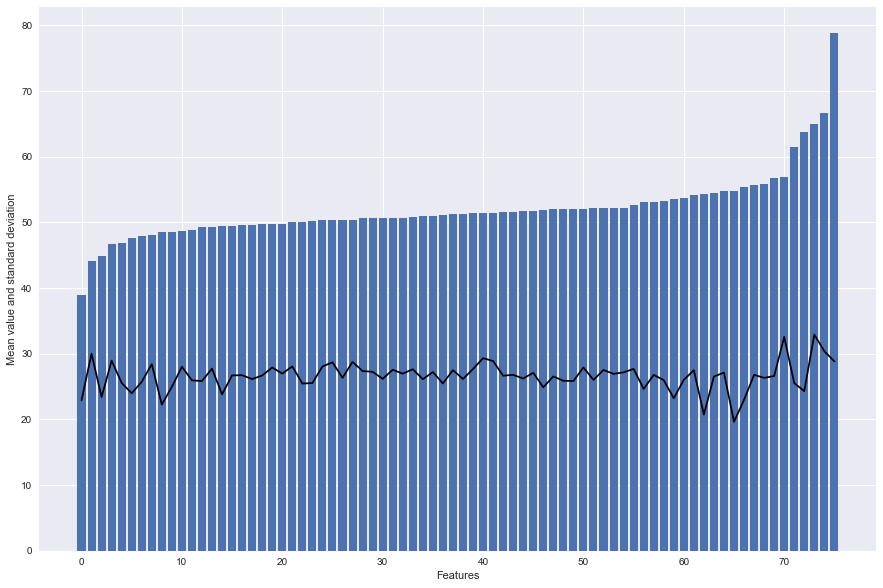

In [10]:
plt.figure(figsize=(15,10))
plt.bar(range(76), lifestyle_mean.iloc[:, 1])
plt.plot(range(76), lifestyle_mean.iloc[:, 2], c='k')
plt.xlabel('Features')
plt.ylabel('Mean value and standard deviation')
plt.show()

(array([ 15585.,  22282.,  24833.,  26435.,  25647.,  58307.,  30085.,
         30429.,  27207.,  18696.]),
 array([ 0.04016298,  0.43376019,  0.8273574 ,  1.22095462,  1.61455183,
         2.00814904,  2.40174625,  2.79534346,  3.18894067,  3.58253789,
         3.9761351 ]),
 <a list of 10 Patch objects>)

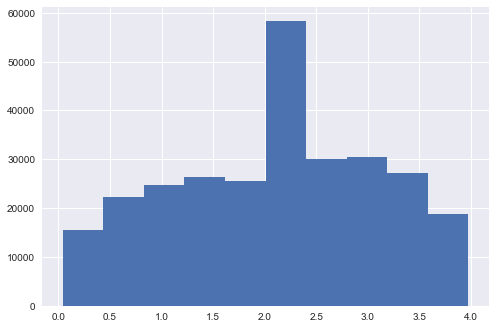

In [119]:
plt.hist(part_222_lifestyle_num['F14825'])

In [13]:
part_222_lifestyle_num = part_222_lifestyle_num / np.std(part_222_lifestyle_num, 0)
part_222_lifestyle_num.head(20)

F14682    F16379    F14813    F16386    F16390    F16394    F16384  \
0   2.652094  0.617389  0.250816  1.535073  1.157391  0.841034  2.619577   
1   2.410994  1.815851  1.791543  1.872040  1.808423  2.002462  1.926160   
2   3.278952  1.670583  3.368101  3.706640  3.182824  0.200246  2.349915   
3   0.916178  1.016877  2.257344  2.733179  2.061602  0.640788  2.003206   
4   4.002251  0.980560  2.329006  2.995265  3.001982  3.083792  1.502404   
5   0.916178  0.326853  3.296439  1.684836  2.242444  0.240295  2.272868   
6   2.652094  2.614826  3.547255  2.808061  3.399835  0.400492  1.155696   
7   0.916178  0.617389  1.934866  2.770620  1.157391  0.560689  1.849113   
8   1.398377  0.581072  1.254080  2.583416  2.133939  0.360443  2.504007   
9   1.977015  0.835291  2.973961  3.332232  3.399835  2.362906  3.004809   
10  4.243350  0.435804  3.045623  2.658297  3.291329  2.963644  1.425358   
11  2.748534  1.089511  3.009792  3.182469  3.218992  2.162659  1.579451   
12  1.398377  1.452681  2.472329  2.845502  2.061602  1.842265  2.812193   
13  2.410994  1.815851  1.791543  1.872040  1.808423  2.002462  1.926160   
14  2.410994  1.815851  1.791543  1.872040  1.808423  2.002462  1.926160   
15  2.652094  0.363170  2.257344  3.070146  2.133939  2.002462  2.504007   
16  2.507434  2.070070  1.827374  3.257350  2.676466  1.521871  2.850716   
17  3.712932  0.435804  1.863205  3.182469  2.857308  1.682068  2.426961   
18  2.652094  0.581072  2.866469  2.096685  0.831874  2.082561  1.271265   
19  2.652094  0.399487  0.931602  2.695738  1.229727  1.762167  1.155696   

      F14827    F16922    F16377    F14684    F16381    F14708    F16378  \
0   0.657825  0.061411  1.132680  1.218050  2.494988  2.981018  2.179263   
1   1.934780  1.535282  1.826903  2.175090  1.834550  2.099308  1.878675   
2   2.128257  3.039859  0.073076  3.958663  3.595718  2.981018  0.075147   
3   1.393041  3.039859  0.328843  3.045126  2.898589  1.091640  0.263015   
4   3.327821  3.039859  1.644213  3.045126  1.981314  1.721433  2.630146   
5   0.077391  2.702097  0.073076  4.219674  3.265499  0.545820  0.112721   
6   2.128257  2.978448  0.328843  3.958663  3.412263  3.736769  1.991396   
7   1.238259  3.039859  0.255766  3.045126  2.678443  2.015336  0.338162   
8   0.928694  3.039859  0.840376  1.783574  2.384915  2.351225  2.254410   
9   1.973475  1.596694  0.219228  4.263176  3.338881  1.091640  0.526029   
10  3.211734  1.443165  1.863441  3.219133  2.384915  0.923696  2.630146   
11  2.979560  3.039859  0.365381  3.045126  1.761168  1.721433  1.765955   
12  0.348260  2.057278  0.730761  1.305054  3.265499  2.561156  1.728381   
13  1.934780  1.535282  1.826903  2.175090  1.834550  2.099308  1.878675   
14  1.934780  1.535282  1.826903  2.175090  1.834550  2.099308  1.878675   
15  1.354346  2.579274  0.694223  2.218592  3.192117  3.023004  1.540514   
16  1.625215  3.039859  0.876914  1.914079  3.082044  0.755751  1.239926   
17  2.437822  3.039859  1.242294  3.132129  2.128078  2.351225  1.728381   
18  2.360431  1.381754  0.949990  2.218592  1.724477  3.023004  2.893160   
19  1.586519  1.719516  0.511533  1.696570  1.981314  3.023004  1.841102   

      F14686    F14825    F14826    F16385    F16392    F16400    F16376  \
0   2.777814  2.891735  1.299732  2.202624  1.213141  3.247142  0.241755   
1   2.136780  2.008149  1.911370  1.805429  1.784030  1.866173  1.726819   
2   1.282068  3.694994  3.478694  2.960904  0.285445  3.284465  3.350029   
3   0.427356  2.931898  0.382274  2.997012  0.178403  2.426025  2.072183   
4   2.008574  1.606519  3.364012  3.502532  1.784030  2.090114  2.659301   
5   0.555563  2.811409  1.452641  2.094298  0.035681  1.567586  3.177347   
6   1.623953  3.333527  3.784513  2.924795  0.856335  3.545729  2.141256   
7   0.427356  0.240978  0.382274  2.960904  0.249764  2.687290  1.830428   
8   0.341885  2.329453  1.146822  2.960904  0.570890  2.799260  1.623210   
9   1.025655  2.570431  1.720233  3.249772  0.071361

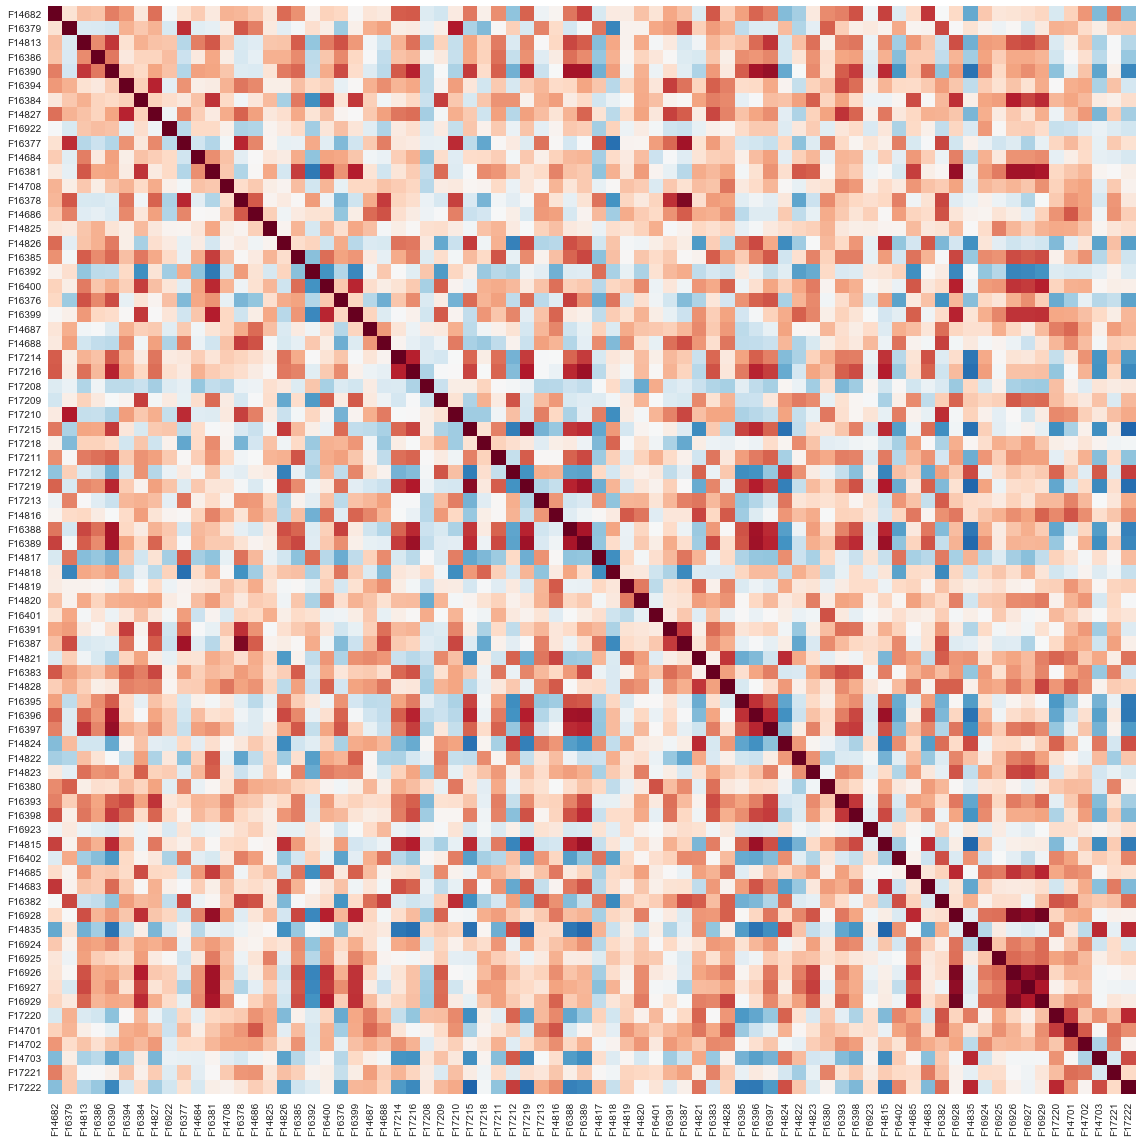

In [14]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1)

sns.heatmap(part_222_lifestyle_num.corr(), square=True, cbar=False)


In [15]:
pca = PCA()
pca.set_params(n_components=None)
pca.fit(part_222_lifestyle_num)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

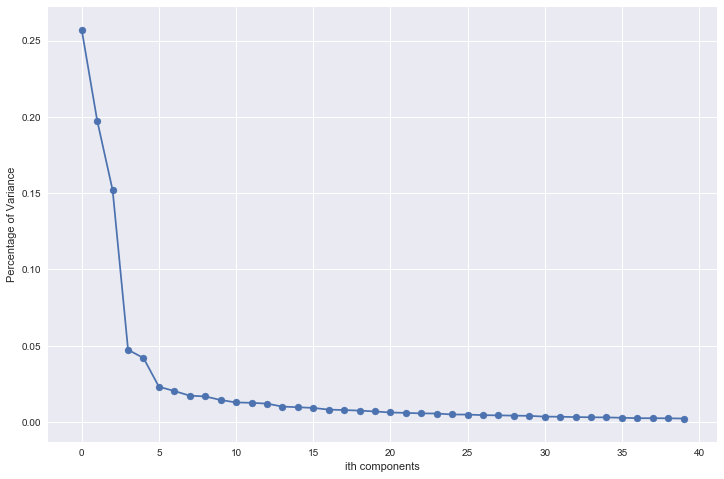

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(range(40), pca.explained_variance_ratio_[:40])
plt.scatter(range(40), pca.explained_variance_ratio_[:40])
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

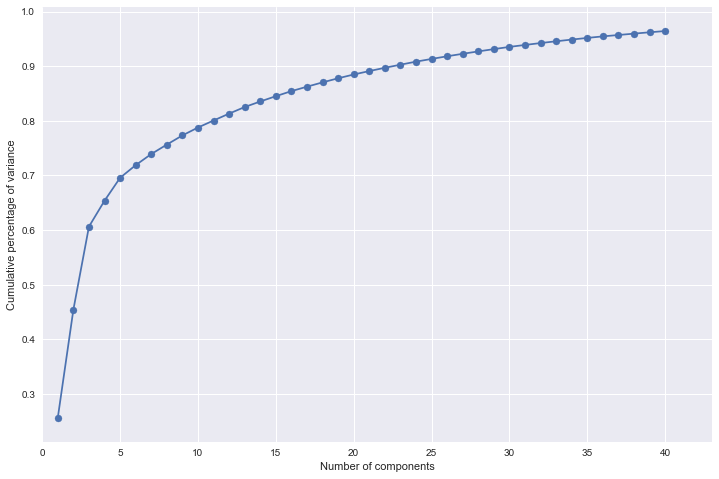

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 41), np.cumsum(pca.explained_variance_ratio_)[:40])
plt.plot(range(1, 41), np.cumsum(pca.explained_variance_ratio_)[:40])
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 43)
plt.show()

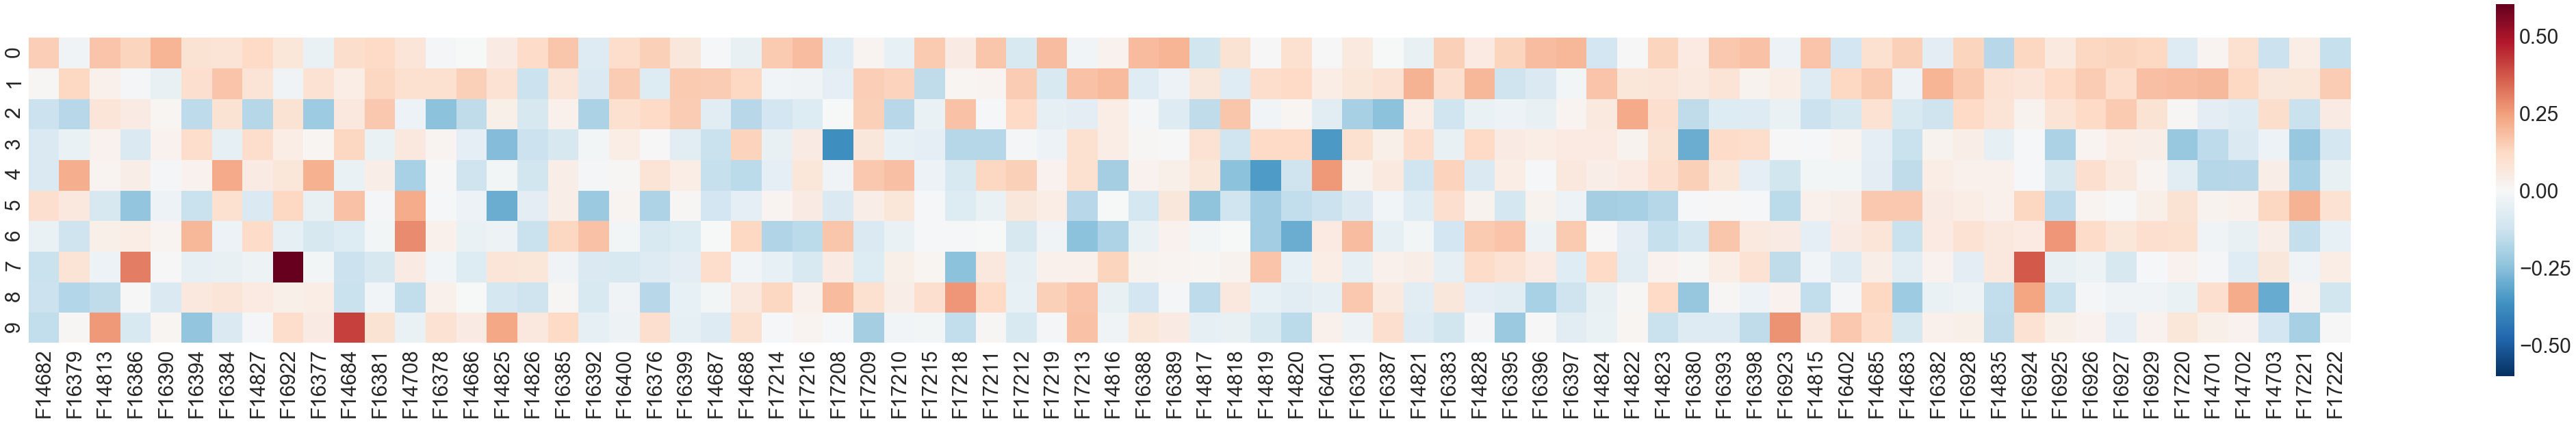

In [19]:
n_components_to_show = min(10, pca.n_components_)
n_input_features = pca.components_.shape[1]

decomp_df = pd.DataFrame(pca.components_[0:n_components_to_show],
                            columns=part_222_lifestyle_num.columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

In [169]:
print(part_222_lifestyle_num.columns[np.abs(pca.components_[4])>0.16])
print(pca.components_[4][np.abs(pca.components_[4])>0.16])

Index(['F16379', 'F16384', 'F16377', 'F14708', 'F14688', 'F17209', 'F17210',
       'F14816', 'F14818', 'F14819', 'F16401', 'F14701', 'F14702', 'F17221'],
      dtype='object')
[ 0.220032    0.22789157  0.21584188 -0.19664019 -0.16356356  0.16155637
  0.18100244 -0.20324012 -0.24785826 -0.34124001  0.26208782 -0.17072116
 -0.16873479 -0.19692055]


PC1 -- financial status of household
'F16944', Active Investor;   'F16943',  Brokerage Account Owner;  'F14833', Have a Retirement Financial Plan;
'F14834', Participate in Online Trading;  'F16928', Frequent Flyer Program Member;  
'F16926', High Frequency Domestic Vacationer;  'F16929', Hotel Guest Loyalty Program;  
'F16941', Credit Card User;  'F16939', Major Credit Card User
PC2 -- interest of younger people
'F16390', Avid Runners;  'F17216', Listens to Alternative Music;  'F17215', Listens to Hip Hop Music;  
'F17219', Listens to Pop Music;  'F16388', Music Download;  'F16389', Music Streaming; 
'F16395', Plays Hockey;  'F16396', Plays Soccer;  'F16397', Plays Tennis;  'F14815', Video Gamer;  
'F14700', -AARP Members;  'F14835', -Have Grandchildren;  'F17222', -Military - Inactive
PC3
'F16379', Arts and Crafts;  'F16394', Boating;  'F14827', Canoeing/Kayaking;  
'F16377', Cat Owners;  'F16378', Dog Owners;  'F16392', Fishing;  'F17210', Listens to Country Music;  
'F17218', -Listens to Jazz Music;  'F14818', -NBA Enthusiast;  'F16391', Outdoor Enthusiast;  
'F16387', Pet Enthusiast;  'F14822', -Political Viewing on TV - Liberal;  'F16921', -High-end Spirit Drinkers;  
'F16936', -Contributes by Volunteering
PC4 
'F17208', Listens to Christian Music;  'F17211', Listens to Music;  'F14819', -NFL Enthusiast;  
'F16401', On a Diet;  'F16380', Scrapbooking;  'F14836', Non-Prestige Makeup Brand User; 
'F16946', Prestige Makeup User;  'F16936', Contributes by Volunteering
PC5 -- philanthropy
'F16922', Casino Gambling;  'F16921', High-end Spirit Drinkers;  'F16924', High Frequency Business Traveler; 
'F16931', Contributes to Arts/Culture Charities;  'F16932', Contributes to Education Charities; 
'F16933', Contributes to Health Charities;  'F16934', Contributes to Political Charities;
'F16935', Contributes to Private Foundations;  'F16938', Corporate Credit Card User
PC6
'F16922', -Casino Gambling;  'F14825', Eats at Family Restaurants;  'F17208', Listens to Christian Music; 
'F17218', Listens to Jazz Music;  'F14818', NBA Enthusiast;  'F14819', NFL Enthusiast; 
'F14692', Security System Owners;  'F14699', Warehouse Club Members;  'F16925', High Frequency Cruise Enthusiast; 
'F14701', Life Insurance Policy Holders;  'F14702', Medical Insurance Policy Holders;  
'F17221', Military - Active;  'F16931', -Contributes to Arts/Culture Charities


In [110]:
pca.set_params(n_components=11)
part_222_lifestyle_num_pca = pca.fit_transform(part_222_lifestyle_num)
pca_df=pd.DataFrame(part_222_lifestyle_num_pca)
pca_df.head(20)

0         1         2         3         4         5         6   \
0  -2.463601  2.426764  2.383260 -4.113351 -1.587714  0.526489  1.710205   
1  -0.090472 -0.479419 -0.045311  0.424249  0.045517 -0.646458  0.166259   
2   7.130154 -1.747705  5.316276 -0.811615 -0.308421 -0.301125  0.301928   
3  -0.780914 -0.364056  7.386788  0.438504  1.423100 -0.177287  2.078750   
4   7.321703 -4.448205 -2.463519  0.051577  0.560381  0.476536  0.707031   
5   0.232400 -1.280983  8.674094 -0.717144 -0.457244  0.945455 -2.015108   
6   6.274094  0.312921 -0.528301  0.070333 -3.671530  0.241596 -0.782284   
7  -1.392202 -1.401264  7.211187  1.125340  0.897084  1.762158  2.547920   
8  -1.671756  0.334559  4.202095 -2.144597  1.523777  0.945342  2.288215   
9   5.393437 -1.725842  6.135902  1.860979  1.137409 -0.521801  1.920449   
10  8.017322 -4.472231 -1.490016  0.759568  0.086708 -0.814062 -1.837275   
11  6.692025 -4.958684  1.084047  0.276072  0.462881  0.832820  2.197669   
12 -1.586497  5.070722  4.875296  0.194939 -1.430241  0.095871  1.414698   
13 -0.090472 -0.479419 -0.045311  0.424249  0.045517 -0.646458  0.166259   
14 -0.090472 -0.479419 -0.045311  0.424249  0.045517 -0.646458  0.166259   
15  1.018421  3.762088  4.615997  0.507266 -2.286760 -0.131260  1.525490   
16  2.376944  0.066284  4.018748 -2.384458  1.797707  0.210533  2.118053   
17  5.220020 -2.418608  1.369267 -2.897830  0.668933  1.171112  2.671989   
18 -1.963585  2.750836  0.709577  0.116554 -2.684123 -1.580804  2.825416   
19 -0.387352  1.522032  1.850870 -0.776493 -3.544371  1.114382  2.541758   

          7         8         9         10  
0  -1.555168  1.382134 -1.086153 -0.975231  
1  -0.451227  0.419202  0.172137  0.338735  
2   1.637441 -2.640201  1.270585  0.619570  
3   1.348573  1.246340  1.522074 -1.393510  
4   0.224981  2.523592  0.303298 -0.602991  
5   0.066539  0.789487  1.930774 -0.394172  
6   1.788495 -0.914536  3.059380 -1.503760  
7   0.980340  1.955876  0.460680 -1.468121  
8   2.015325  1.629988  0.599925 -1.926051  
9  -0.338025  0.612972  0.070055 -0.536256  
10 -2.106359  1.938254 -0.159754 -0.767814  
11  0.575082  1.900214  0.330309 -0.834209  
12  1.484467  0.906543 -0.435261 -2.789855  
13 -0.451227  0.419202  0.172137  0.338735  
14 -0.451227  0.419202  0.172137  0.338735  
15  1.232915  0.027368 -0.660639 -1.900202  
16  1.155570  1.557662  0.335791 -1.581301  
17  1.089527  0.233174  0.067449 -0.705902  
18  0.241586  0.975278  0.377974 -2.179930  
19  1.190753  0.868133 -0.917241 -1.839539

finished 1th iteration
finished 2th iteration
finished 3th iteration
finished 4th iteration
finished 5th iteration
finished 6th iteration
finished 7th iteration
finished 8th iteration
finished 9th iteration
finished 10th iteration
finished 11th iteration
finished 12th iteration
finished 13th iteration
finished 14th iteration
finished 15th iteration
finished 16th iteration
finished 17th iteration
finished 18th iteration
finished 19th iteration


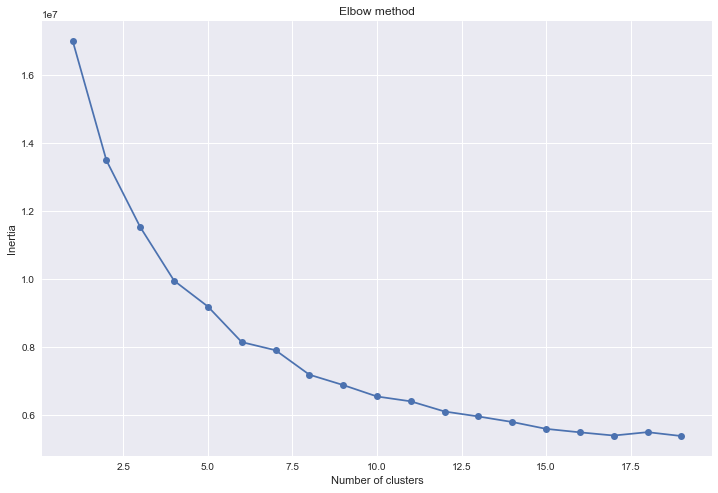

In [122]:
minibatchkmeans_PCA = MiniBatchKMeans()
plot_inertia(minibatchkmeans_PCA, pca_df, range(1, 20))

In [124]:
minibatchkmeans_PCA.set_params(n_clusters=8)
minibatchkmeans_PCA.fit(pca_df)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

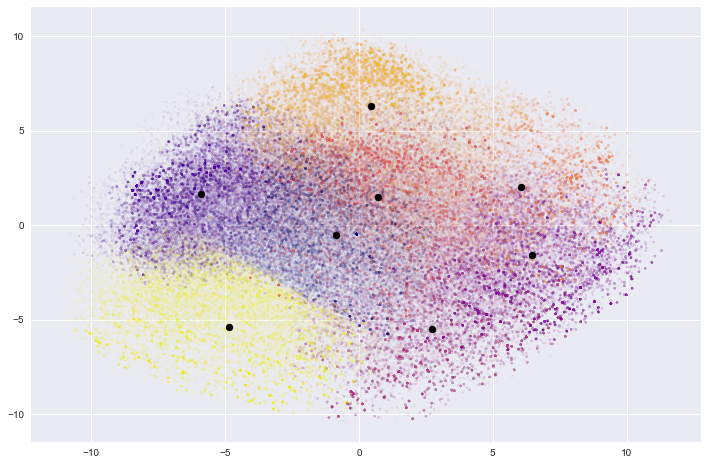

In [126]:
cluster_center = pd.DataFrame(minibatchkmeans_PCA.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0], pca_df[1], c=minibatchkmeans_PCA.labels_, alpha=0.03, cmap='plasma', s=5)
plt.scatter(cluster_center[0], cluster_center[1], c='k', s=50)

In [127]:
cluster_res = pd.DataFrame(minibatchkmeans_PCA.cluster_centers_)
cluster_res

0         1         2         3         4         5         6   \
0 -0.863574 -0.522381  0.181710 -0.052451  0.145076 -0.137500  0.378626   
1 -5.897911  1.654687 -2.360038 -0.533413 -1.514318 -0.337183  0.028082   
2  6.464758 -1.568915  0.734519 -0.345273 -0.609373 -0.213484 -0.007540   
3  2.727740 -5.498592 -3.674403 -0.003531  0.173535  0.193551  0.146318   
4  0.712305  1.494778  4.723242 -0.585521 -0.651164  0.013510 -0.262813   
5  6.039551  2.004933 -4.686083  0.184793 -0.215770 -0.353975 -0.232179   
6  0.451489  6.286945 -1.861591  1.156889  2.129636  0.651087 -0.263255   
7 -4.861658 -5.406474  0.144019  0.571621  0.885670  0.263508 -0.215706   

         7         8         9         10  
0 -0.078692  0.124150  0.012892 -0.008903  
1 -0.120792 -0.162339  0.018295  0.275412  
2 -0.151260  0.106256 -0.079217 -0.111424  
3 -0.041197  0.105882 -0.065768 -0.157024  
4  0.118357  0.002812 -0.220036 -0.115122  
5  0.183840  0.475060  0.538777  0.259407  
6 -0.209007 -0.678374  0.139208 -0.137137  
7  0.033390 -0.280916 -0.007294 -0.045260

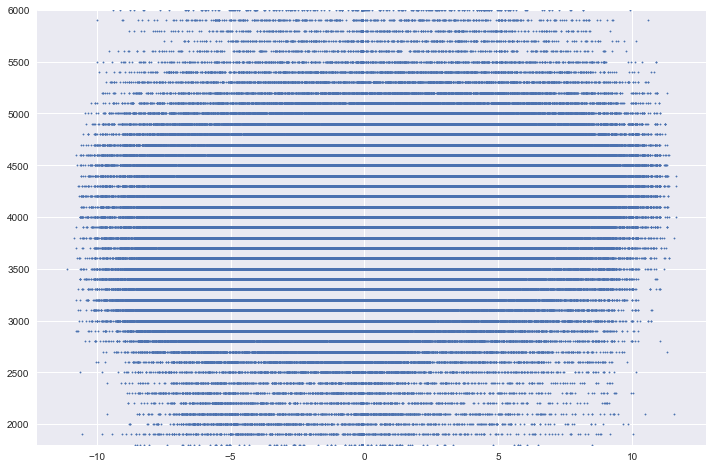

In [74]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0],part_222['F3753'], alpha=1, s=2)
plt.ylim(1800, 6000)
plt.show()

In [78]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(pca_df[1].reshape(-1, 1),part_222['F14592'].reshape(-1, 1))

C:\Users\liyadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
print(ols.coef_, ols.intercept_)

[[-4.47918997]] [ 66.16342762]


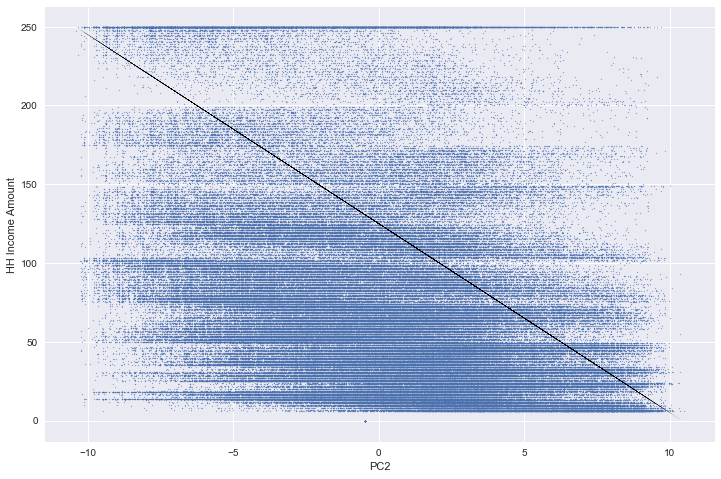

In [109]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_df[1],part_222['F14592'], alpha=.5, s=1)
plt.plot(pca_df[1], 125-12*pca_df[1], c='k', lw=0.01, linestyle='--')

plt.xlabel('PC2')
plt.ylabel('HH Income Amount')

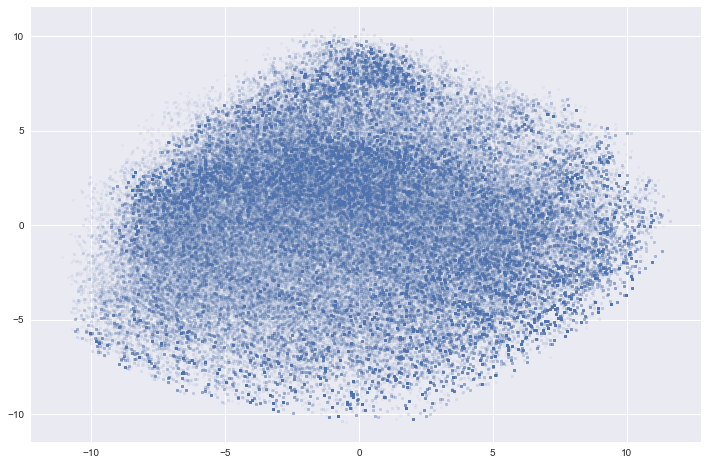

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0], pca_df[1], alpha=0.05, s=8)

In [22]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
        print("finished {}th iteration".format(i))
    plt.figure(figsize=(12, 8))
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

finished 1th iteration
finished 2th iteration
finished 3th iteration
finished 4th iteration
finished 5th iteration
finished 6th iteration
finished 7th iteration
finished 8th iteration
finished 9th iteration
finished 10th iteration
finished 11th iteration
finished 12th iteration
finished 13th iteration
finished 14th iteration
finished 15th iteration
finished 16th iteration
finished 17th iteration
finished 18th iteration
finished 19th iteration


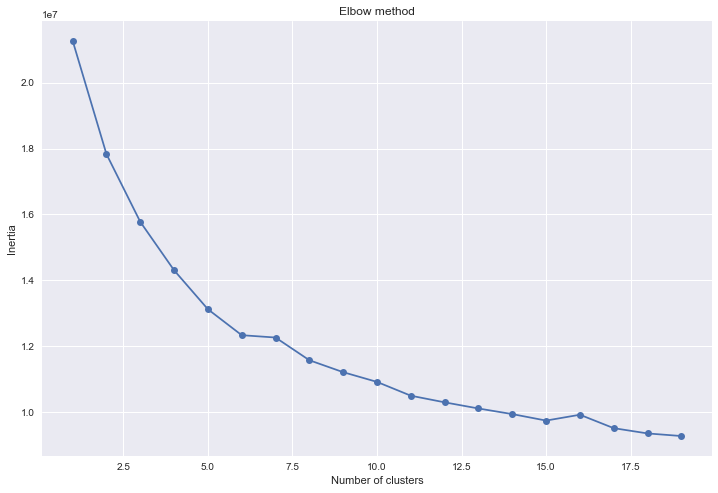

In [27]:
minibatchkmeans = MiniBatchKMeans()
plot_inertia(minibatchkmeans, part_222_lifestyle_num, range(1, 20))

In [129]:
minibatchkmeans.set_params(n_clusters=8)
minibatchkmeans.fit(part_222_lifestyle_num)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

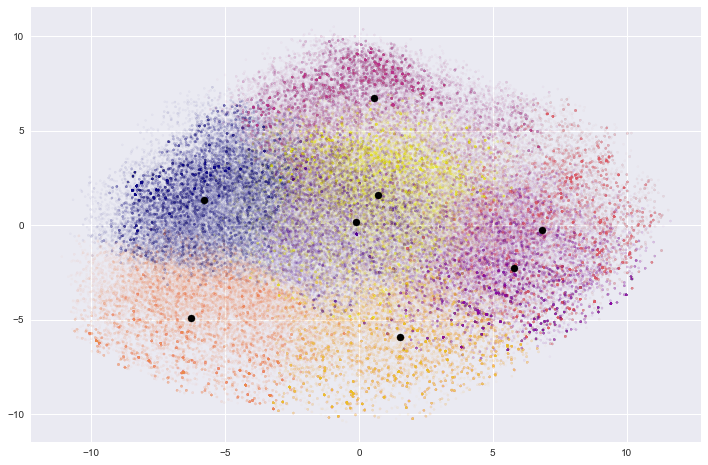

In [130]:
cluster_center = pd.DataFrame(pca.transform(minibatchkmeans.cluster_centers_))

plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0], pca_df[1], c=minibatchkmeans.labels_, alpha=0.03, cmap='plasma', s=5)
plt.scatter(cluster_center[0], cluster_center[1], c='k', s=50)

In [131]:
cluster_res = pd.DataFrame(pca.transform(minibatchkmeans.cluster_centers_))
cluster_res

0         1         2         3         4         5         6   \
0 -5.796723  1.320134 -1.166220 -0.796379 -0.784474 -0.046042 -0.145655   
1 -0.109583  0.169594  0.019315  0.013776 -0.134032 -0.099438  0.339333   
2  5.793447 -2.253148  2.323498 -0.135496 -0.097179  0.073778 -0.026054   
3  0.543330  6.724914 -1.713195  1.119276  1.825887  0.606453 -0.247295   
4  6.821552 -0.248399 -3.780763 -0.186094 -0.520741 -0.498495 -0.238289   
5 -6.269633 -4.906850  0.161678  0.455876  1.056943 -0.259603 -0.273488   
6  1.531022 -5.914133 -2.172424  0.377297  0.025010  0.649945  0.492017   
7  0.692995  1.597489  5.485640 -0.340948 -0.682875 -0.098193 -0.175796   

         7         8         9         10  
0 -0.043023  0.132782  0.003472  0.335394  
1 -0.093403  0.053240 -0.020590 -0.021021  
2 -0.234732 -0.300851 -0.366130  0.202604  
3 -0.331790 -0.673501  0.073599 -0.182967  
4 -0.033408  0.986307  0.183142 -0.072982  
5  0.087733 -0.165827 -0.070104 -0.210686  
6  0.150259 -0.145964  0.035780  0.125473  
7  0.189289 -0.002593 -0.024284 -0.152601

In [132]:
cluster_res_sorted = cluster_res.sort_values(0,axis=0)
cluster_res_sorted

0         1         2         3         4         5         6   \
5 -6.269633 -4.906850  0.161678  0.455876  1.056943 -0.259603 -0.273488   
0 -5.796723  1.320134 -1.166220 -0.796379 -0.784474 -0.046042 -0.145655   
1 -0.109583  0.169594  0.019315  0.013776 -0.134032 -0.099438  0.339333   
3  0.543330  6.724914 -1.713195  1.119276  1.825887  0.606453 -0.247295   
7  0.692995  1.597489  5.485640 -0.340948 -0.682875 -0.098193 -0.175796   
6  1.531022 -5.914133 -2.172424  0.377297  0.025010  0.649945  0.492017   
2  5.793447 -2.253148  2.323498 -0.135496 -0.097179  0.073778 -0.026054   
4  6.821552 -0.248399 -3.780763 -0.186094 -0.520741 -0.498495 -0.238289   

         7         8         9         10  
5  0.087733 -0.165827 -0.070104 -0.210686  
0 -0.043023  0.132782  0.003472  0.335394  
1 -0.093403  0.053240 -0.020590 -0.021021  
3 -0.331790 -0.673501  0.073599 -0.182967  
7  0.189289 -0.002593 -0.024284 -0.152601  
6  0.150259 -0.145964  0.035780  0.125473  
2 -0.234732 -0.300851 -0.366130  0.202604  
4 -0.033408  0.986307  0.183142 -0.072982

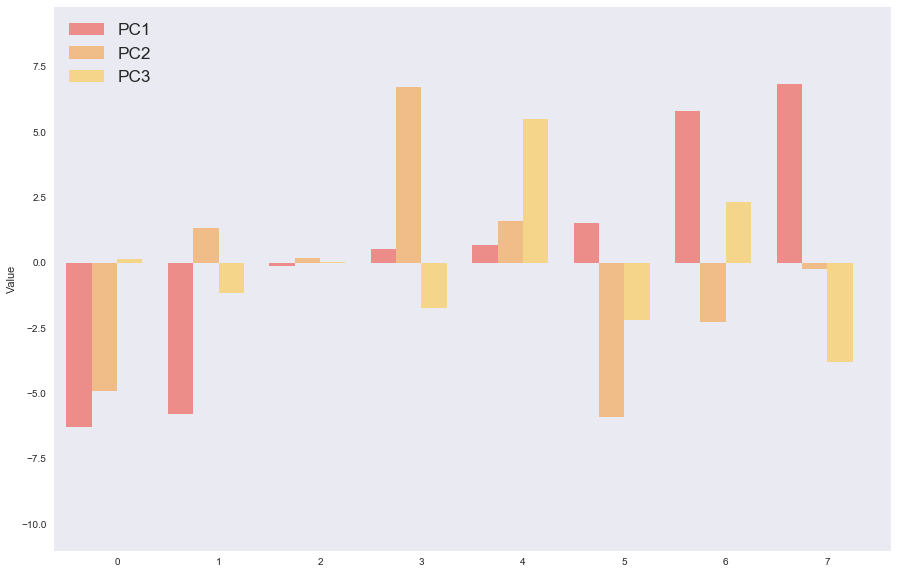

In [133]:
pos = list(range(8))
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        cluster_res_sorted.iloc[:,0], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label='PC1')

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([(p + width) for p in pos],
        #using df['mid_score'] data,
        cluster_res_sorted.iloc[:,1],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label='PC2')

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        cluster_res_sorted.iloc[:,2], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label='PC3')

# Set the y axis label
ax.set_ylabel('Value')

# Set the chart's title
# ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(range(8))

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([min(cluster_res.iloc[:,0] + cluster_res.iloc[:,1] + cluster_res.iloc[:,2]), 
          max(cluster_res.iloc[:,0] + cluster_res.iloc[:,1] + cluster_res.iloc[:,2])+2])

# Adding the legend and showing the plot
plt.legend(['PC1', 'PC2', 'PC3'], loc='upper left', fontsize='x-large')
plt.grid()
plt.show()

In [142]:
anal_res = pd.DataFrame({'clusters':minibatchkmeans.labels_,
                        'pc1':pca_df[0],
                        'pc2':pca_df[1],
                        'pc3':pca_df[2],
                        'F4850':part_222_lifestyle_char['F4850'],
                        'F4810':part_222_lifestyle_char['F4810'],
                        'F4871':part_222_lifestyle_char['F4871'],
                        'F4874':part_222_lifestyle_char['F4874'],
                        'F4855':part_222_lifestyle_char['F4855'],
                        'F8975':part_222_lifestyle_char['F8975'],
                        'F8977':part_222_lifestyle_char['F8977'],
                        'F9253':part_222_lifestyle_char['F9253'],
                        'F9273':part_222_lifestyle_char['F9273'],
                        'F9269':part_222_lifestyle_char['F9269']})
anal_res

F4810  F4850  F4855  F4871  F4874  F8975  F8977  F9253  F9269  F9273  \
0         0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
1         0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
2         1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3         1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4         1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5         1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
6         0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
7         1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
8         0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9         0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
10        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
11        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12        0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
13        0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
14        0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
15        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
16        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
17        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18        0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
19        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
20        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
21        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
22        0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
23        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
24        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
25        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
26        0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
27        0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
28        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
29        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
279476    0.0    0.0    0.0    0.0    0.0    0.5    0.5    0.5    0.5    0.5   
279477    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279478    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279479    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
279480    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279481    1.0    1.0    1.0    1.0    0.0    1.0    1.0    0.0    0.0    1.0   
279482    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279483    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
279484    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279485    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279486    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
279487    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
279488    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
279489    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279490    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
279491    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
279492    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    1.0    0.0   
279493    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
279494  

In [146]:
anal_res.groupby('clusters', axis=0).mean().sort_values('pc1',axis=0)

F4810     F4850     F4855     F4871     F4874     F8975  \
clusters                                                               
5         0.866611  0.895821  0.862190  0.855124  0.851912  0.896501   
0         0.508644  0.529893  0.513614  0.497599  0.494694  0.702783   
1         0.560203  0.571352  0.555362  0.546069  0.541811  0.612880   
3         0.452824  0.473940  0.453136  0.420885  0.412682  0.645442   
7         0.578416  0.601865  0.577011  0.557001  0.546512  0.726357   
6         0.886030  0.898659  0.865793  0.854616  0.848419  0.892854   
2         0.832396  0.832759  0.811532  0.784789  0.768860  0.850484   
4         0.690555  0.659001  0.643330  0.612164  0.603324  0.738026   

             F8977     F9253     F9269     F9273       pc1       pc2       pc3  
clusters                                                                        
5         0.894234  0.888641  0.893213  0.898201 -5.816368 -4.656116  0.561528  
0         0.699974  0.695460  0.700766  0.705712 -5.605243  1.524159 -1.607674  
1         0.610512  0.603604  0.608463  0.618799 -0.264535 -0.088037  0.030486  
3         0.639734  0.627632  0.638673  0.661317  0.339158  6.311155 -1.778416  
7         0.721778  0.704288  0.718023  0.729288  0.444676  1.731120  5.011385  
6         0.888579  0.878539  0.884618  0.909130  1.226509 -5.884211 -2.491926  
2         0.841776  0.817464  0.830056  0.867611  5.536839 -2.086107  2.810786  
4         0.731018  0.718481  0.726194  0.797788  6.664705 -0.054646 -3.993693

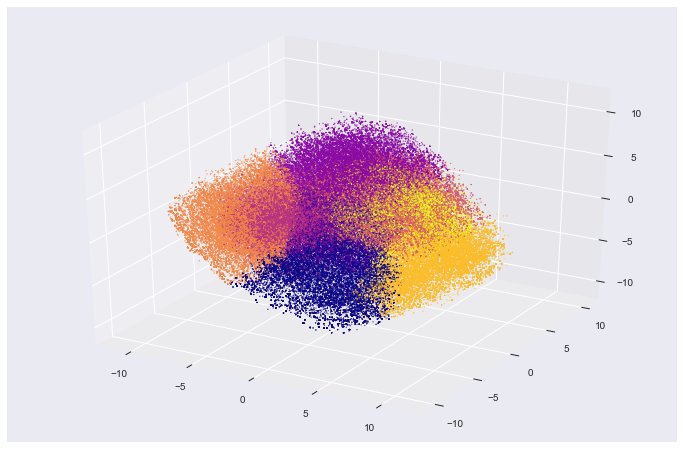

In [114]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df[0], pca_df[1], pca_df[2], s=1, c=minibatchkmeans.labels_, cmap='plasma')
# %matplotlib inline

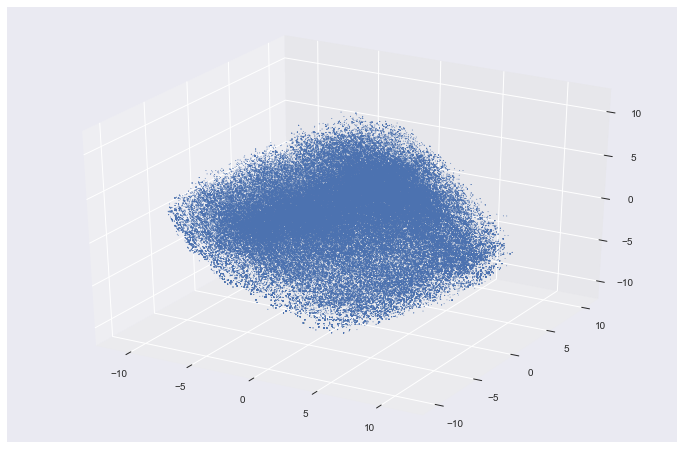

In [116]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df[0], pca_df[1], pca_df[2], s=0.5)

In [88]:
pca_df.std(axis=0)

0     142.726234
1     127.089035
2      98.602291
3      63.870121
4      57.837024
5      51.700178
6      37.576694
7      35.886237
8      33.679583
9      32.056950
10     30.305536
11     29.955394
dtype: float64

In [136]:
lifestyle_char = pd.read_csv('lifestyle_char.csv', header=None)
lifestyle_char.shape

(202, 1)

In [137]:
part_222_lifestyle_char = part_222[lifestyle_char[0]]
part_222_lifestyle_char.replace('Y', 1, inplace=True)
part_222_lifestyle_char.replace('U', 0, inplace=True)
part_222_lifestyle_char.fillna(0.5, inplace=True)
# part_222_lifestyle_char = part_222_lifestyle_char / np.std(part_222_lifestyle_char, 0)
part_222_lifestyle_char.head(20)

C:\Users\liyadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\liyadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liyadi\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


F4826  F4850  F4817  F4844  F4822  F4856  F4841  F4842  F4808  F4813  \
0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
2     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3     1.0    1.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0   
4     1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
5     1.0    1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0   
6     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7     1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9     0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
10    1.0    1.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0    1.0   
11    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
12    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
14    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
15    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
17    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0    0.0    1.0   

    F4811  F4812  F4821  F4810  F4820  F4871  F4874  F4877  F4878  F4809  \
0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
2     1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
3     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    1.0   
4     0.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    0.0    0.0   
5     0.0    0.0    1.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0   
6     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7     1.0    0.0    0.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0   
8     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9     0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
10    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
11    0.0    0.0    0.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0   
12    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
14    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
15    1.0    0.0    1.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0   
16    0.0    0.0    0.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0   
17    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0   

    F4847  F4827  F4819  F4849  F4828  F4831  F4843  F4855  F4832  F4818  \
0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   
2     0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3     0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    0.0    1.0   
4     0.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
5     0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0    1.0   
6     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7     0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
8     0.0    0.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0   
9     0.0    0.0    0.0    0.0    0.0    0.0    0.

In [138]:
lifestyle_char_count = part_222_lifestyle_char.apply(pd.value_counts)
lifestyle_char_count

F4826   F4850   F4817   F4844   F4822   F4856   F4841   F4842   F4808  \
0.0  149410   81785  180307  213179  162891  157708  219872  226679  202713   
0.5   29979   29979   29979   29979   29979   29979   29979   29979   29979   
1.0  100117  167742   69220   36348   86636   91819   29655   22848   46814   

      F4813   F4811   F4812   F4821   F4810   F4820   F4871   F4874   F4877  \
0.0  189232  191410  190358  161334   85155  230273   92966   94957  193210   
0.5   29979   29979   29979   29979   29979   29979   29979   29979   29979   
1.0   60295   58117   59169   88193  164372   19254  156561  154570   56317   

      F4878   F4809   F4847   F4827   F4819   F4849   F4828   F4831   F4843  \
0.0  228346  232240  240600  180037  206477  203544  208495  229578  198074   
0.5   29979   29979   29979   29979   29979   29979   29979   29979   29979   
1.0   21181   17287    8927   69490   43050   45983   41032   19949   51453   

      F4855   F4832   F4818   F4806   F4858   F4868   F4866   F4867   F4875  \
0.0   87819  150765  210107  228665  195066  232345  233447  221117  195086   
0.5   29979   29979   29979   29979   29979   29979   29979   29979   29979   
1.0  161708   98762   39420   20862   54461   17182   16080   28410   54441   

      F4825   F4873   F4824   F4830   F4845   F3514   F4870   F4829   F4823  \
0.0  186353  232530  233515  220815  242456  206364  220344  230542  222038   
0.5   29979   29979   29979   29979   29979   29979   29979   29979   29979   
1.0   63174   16997   16012   28712    7071   43163   29183   18985   27489   

      F4835   F8824   F8827   F8828   F8823   F8830   F8825   F8834   F8835  \
0.0  211322  176715  173711  170600  153829  171867  162684  146764  161174   
0.5   29979   97083   97083   97083   97083   97083   97083   97083   97083   
1.0   38205    5708    8712   11823   28594   10556   19739   35659   21249   

      F8833   F8837   F8836   F8839   F8840   F8841   F8842   F8843   F8856  \
0.0  127388  165010  169948  154691  167330  176695  174941  167756  154118   
0.5   97083   97083   97083   97083   97083   97083   97083   97083   97083   
1.0   55035   17413   12475   27732   15093    5728    7482   14667   28305   

      F8852   F8859   F8855   F8876   F8875   F8868   F8872   F8867   F8877  \
0.0  148331  156125  156218  168415  154879  141893  143210  171352  163130   
0.5   97083   97083   97083   97083   97083   97083   97083   97083   97083   
1.0   34092   26298   26205   14008   27544   40530   39213   11071   19293   

      F8883   F8886   F8888   F8885   F8890   F8892   F8884   F8887   F8897  \
0.0  164931  166202  153601  169249  176529  162629  164738  152819  159084   
0.5   97083   97083   97083   97083   97083   97083   97083   97083   97083   
1.0   17492   16221   28822   13174    5894   19794   17685   29604   23339   

      F8898   F8923   F8900   F8901   F8902   F8903   F8904   F8905   F8906  \
0.0  160611  154950  159868  173922  159267  169923  164221  169719  169843   
0.5   97083   97083   97083   97083   97083   97083   97083   97083   97083   
1.0   21812   27473   22555    8501   23156   12500   18202   12704   12580   

      F8907   F8909   F8910   F8911   F8912   F8915   F8916   F8917   F8918  \
0.0  167874  163906  177246  165097  169848  167168  173520  174556  165979   
0.5   97083   97083   97083   97083   97083   97083   97083   97083   97083   
1.0   14549   18517    5177   17326   12575   15255    8903    7867   16444   

      F8919   ...     F8925   F8931   F8932   F8926   F8927   F8928   F8930  \
0.0  169649   ...    168981  159653  152917  177745  179874  163313  167109   
0.5   97083   ...     97083   97083   97083   97083   97083   97083   97083   
1.0   12774   ...     13442   22770   29506    4678    2549   19110   15314   

      F8934   F8936   F8948   F8938   F8952   F8940   F8944   F8945   F8937  \
0.0  158026  160506  173392  157509  176575  160887  147327  161339  171589   
0.5   97083   97083   97083   97083   97083 

In [42]:
lifestyle_char_count.iloc[0,:]

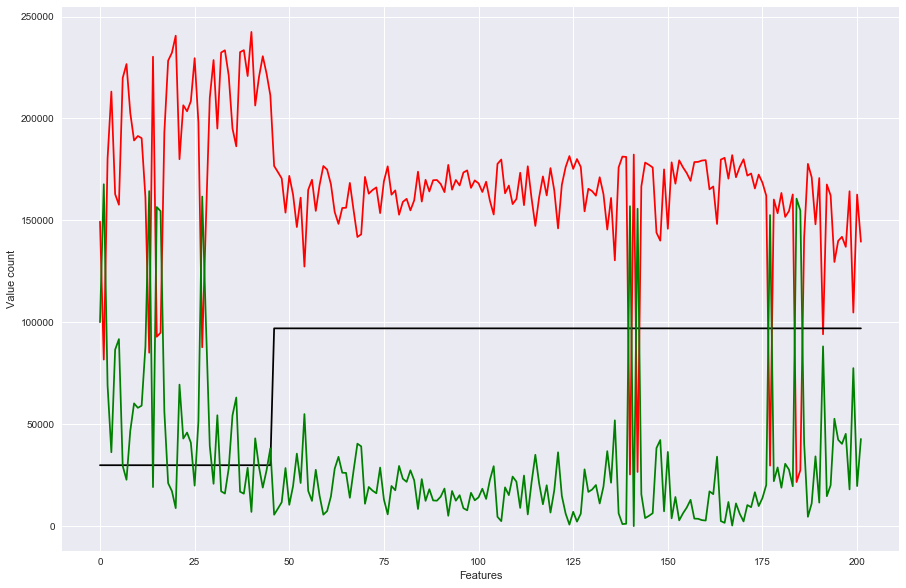

In [140]:
plt.figure(figsize=(15,10))
plt.plot(range(202), lifestyle_char_count.iloc[0,:], c='r')
plt.plot(range(202), lifestyle_char_count.iloc[1,:], c='k')
plt.plot(range(202), lifestyle_char_count.iloc[2,:], c='g')
plt.xlabel('Features')
plt.ylabel('Value count')
plt.show()

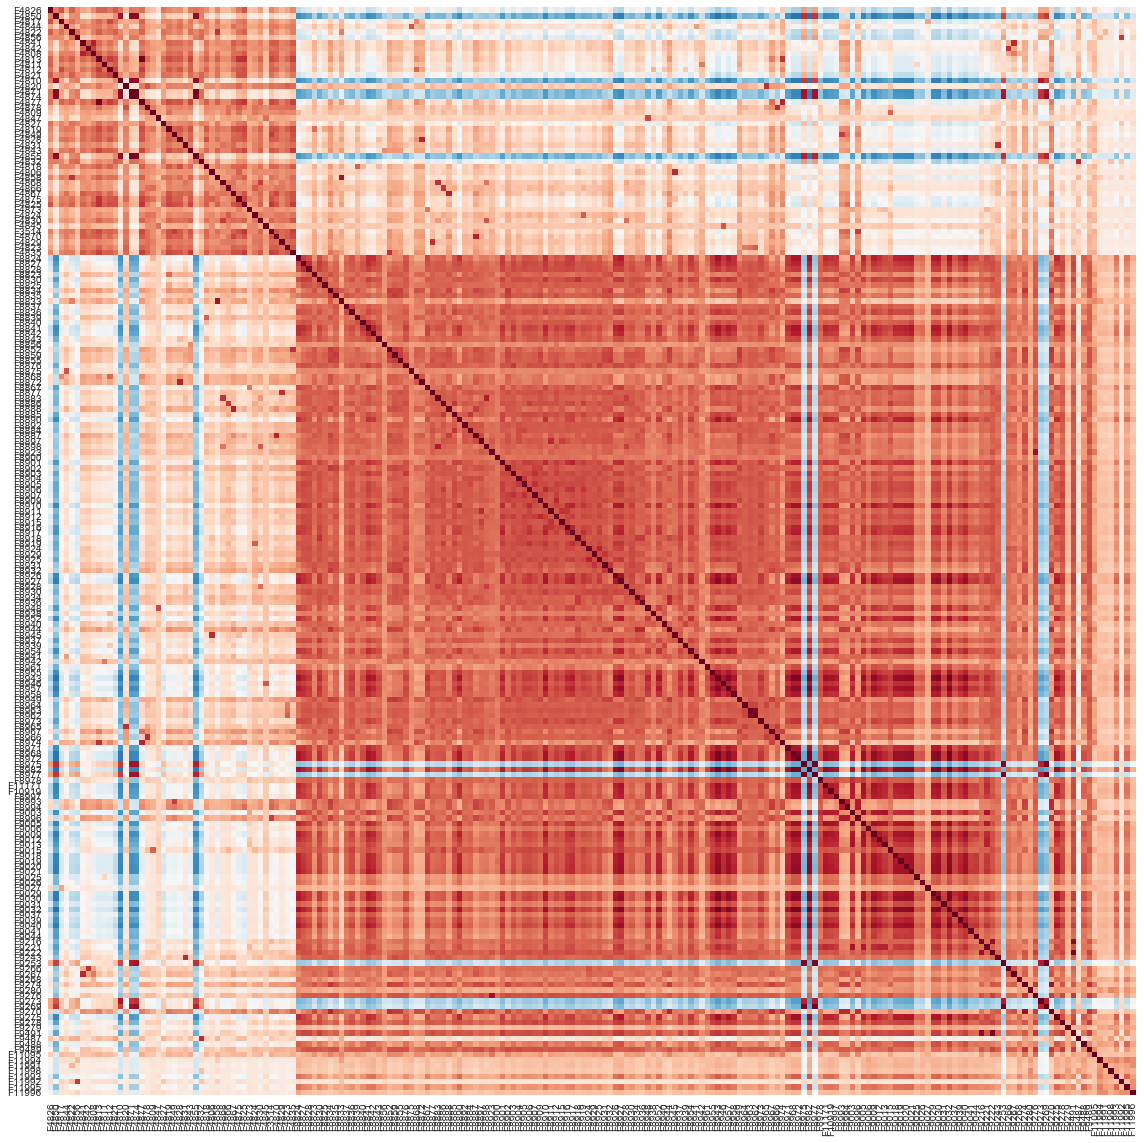

In [182]:
plt.figure(figsize=(20, 20))
sns.heatmap(part_222_lifestyle_char.corr(), square=True, cbar=False)

In [197]:
pca_c = PCA()
pca_c.set_params(n_components=None)
pca_c.fit(part_222_lifestyle_char)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

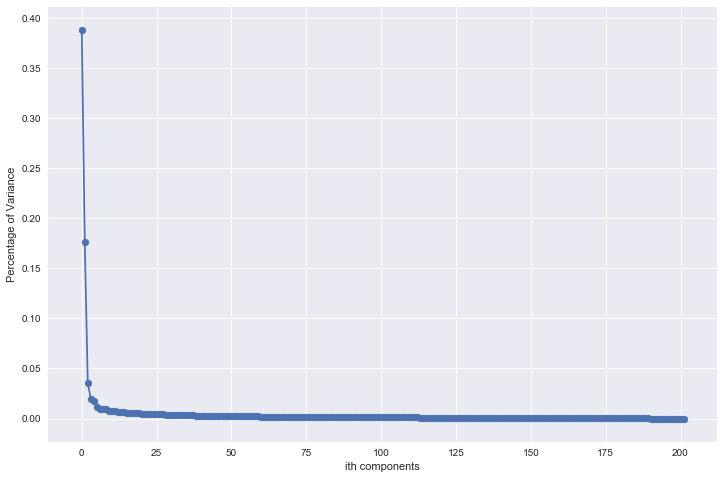

In [199]:
plt.figure(figsize=(12, 8))
plt.plot(range(202), pca_c.explained_variance_ratio_)
plt.scatter(range(202), pca_c.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

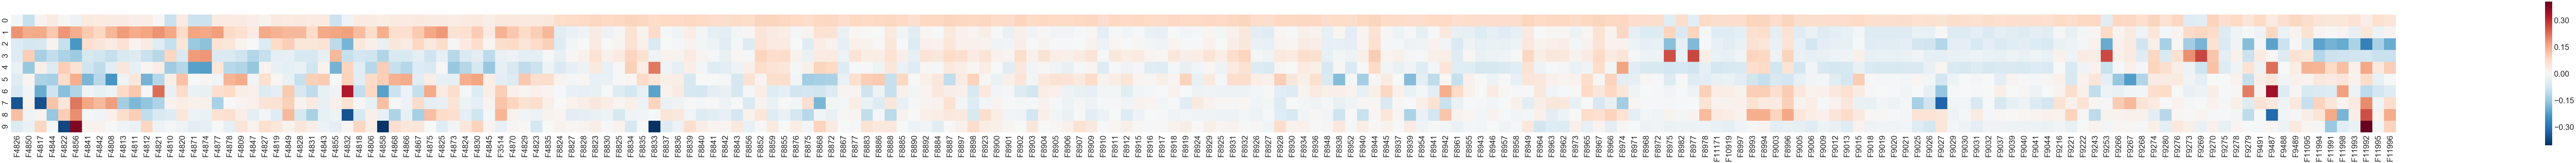

In [200]:
n_components_to_show = min(10, pca_c.n_components_)
n_input_features = pca_c.components_.shape[1]

decomp_df = pd.DataFrame(pca_c.components_[0:n_components_to_show],
                            columns=part_222_lifestyle_char.columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

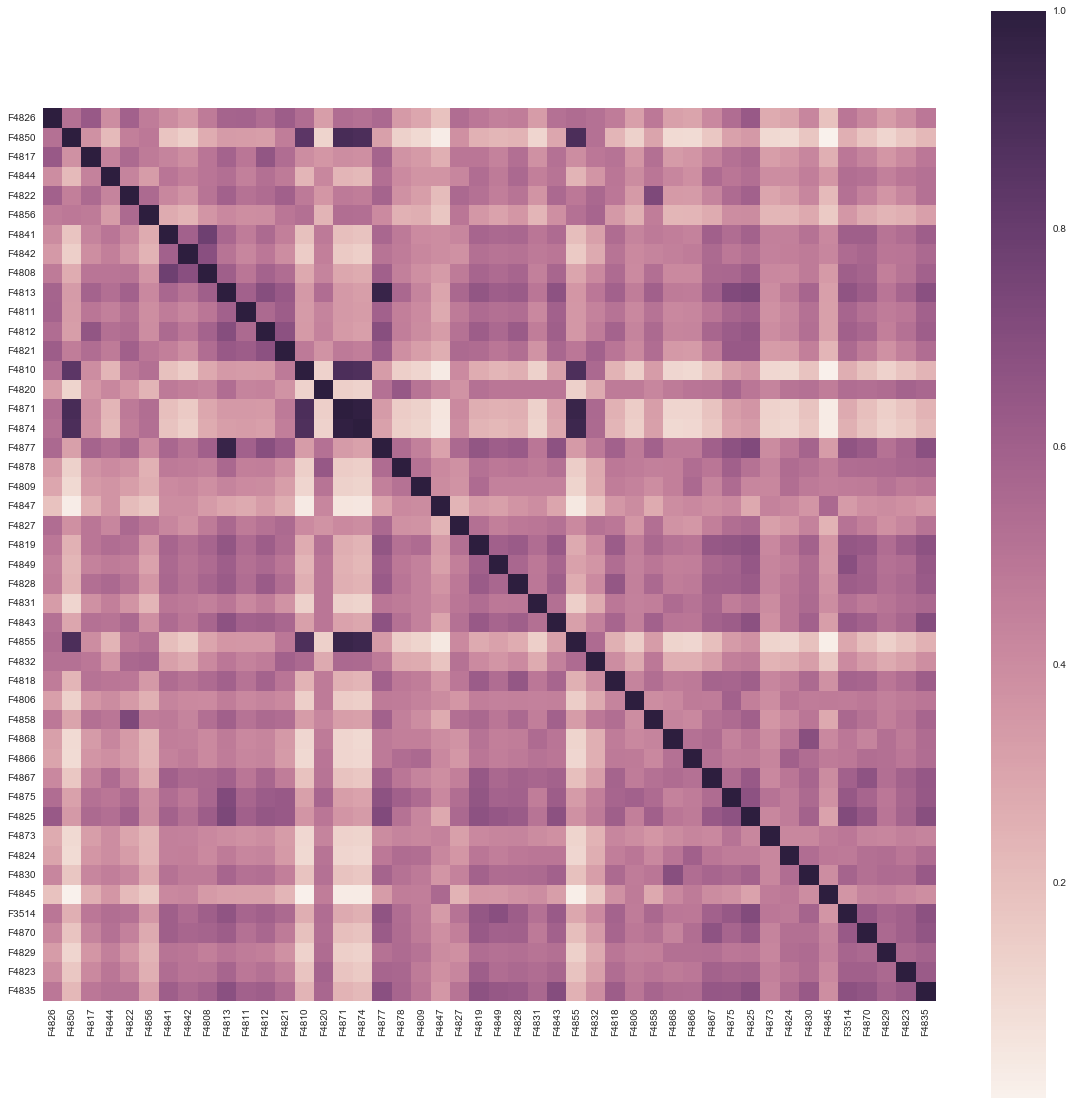

In [196]:
plt.figure(figsize=(20, 20))
sns.heatmap(part_222_lifestyle_char.iloc[:,0:46].corr(), square=True)

In [218]:
pca_c1 = PCA()
pca_c1.set_params(n_components=None)
pca_c1.fit(part_222_lifestyle_char.iloc[:,0:46])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

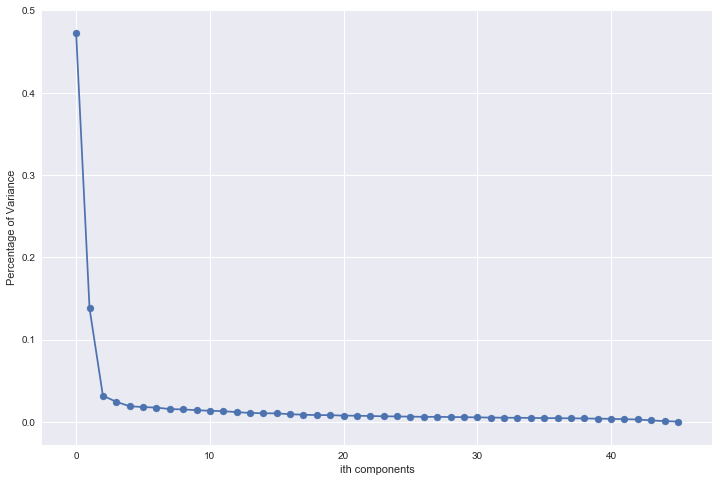

In [219]:
plt.figure(figsize=(12, 8))
plt.plot(range(46), pca_c1.explained_variance_ratio_)
plt.scatter(range(46), pca_c1.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

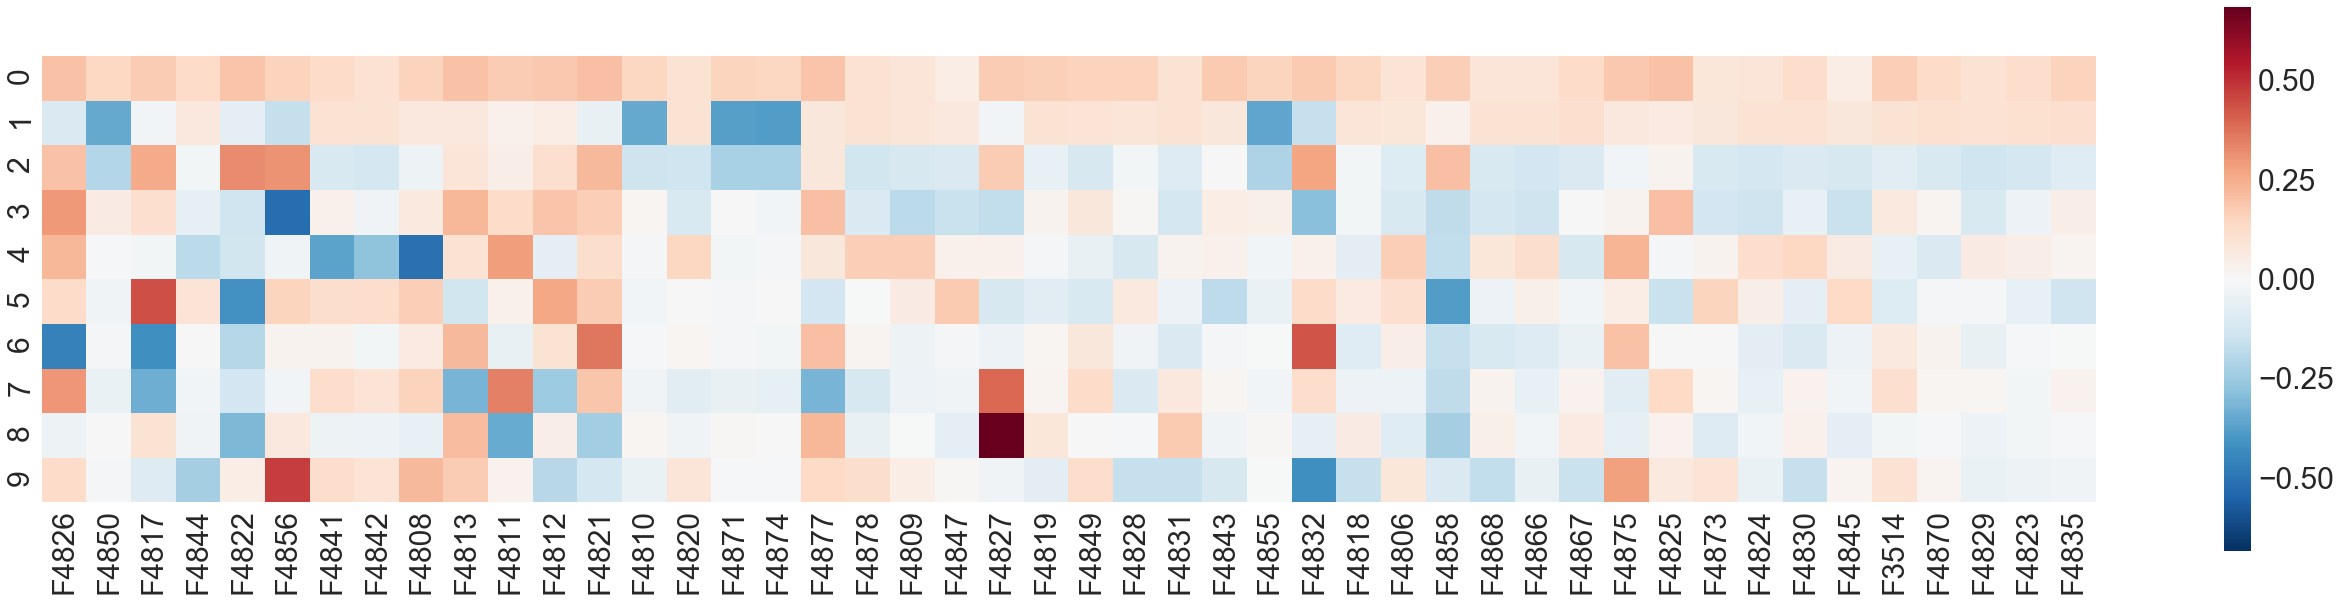

In [204]:
n_components_to_show = min(10, pca_c1.n_components_)
n_input_features = pca_c1.components_.shape[1]

decomp_df = pd.DataFrame(pca_c1.components_[0:n_components_to_show],
                            columns=part_222_lifestyle_char.iloc[:,0:46].columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

In [211]:
print(part_222_lifestyle_char.iloc[:,0:46].columns[np.abs(pca_c1.components_[1])>0.16])
print(pca_c1.components_[1][np.abs(pca_c1.components_[1])>0.16])

Index(['F4850', 'F4856', 'F4810', 'F4871', 'F4874', 'F4855'], dtype='object')
[-0.35191556 -0.16216528 -0.35086453 -0.37555637 -0.38019473 -0.36165831]


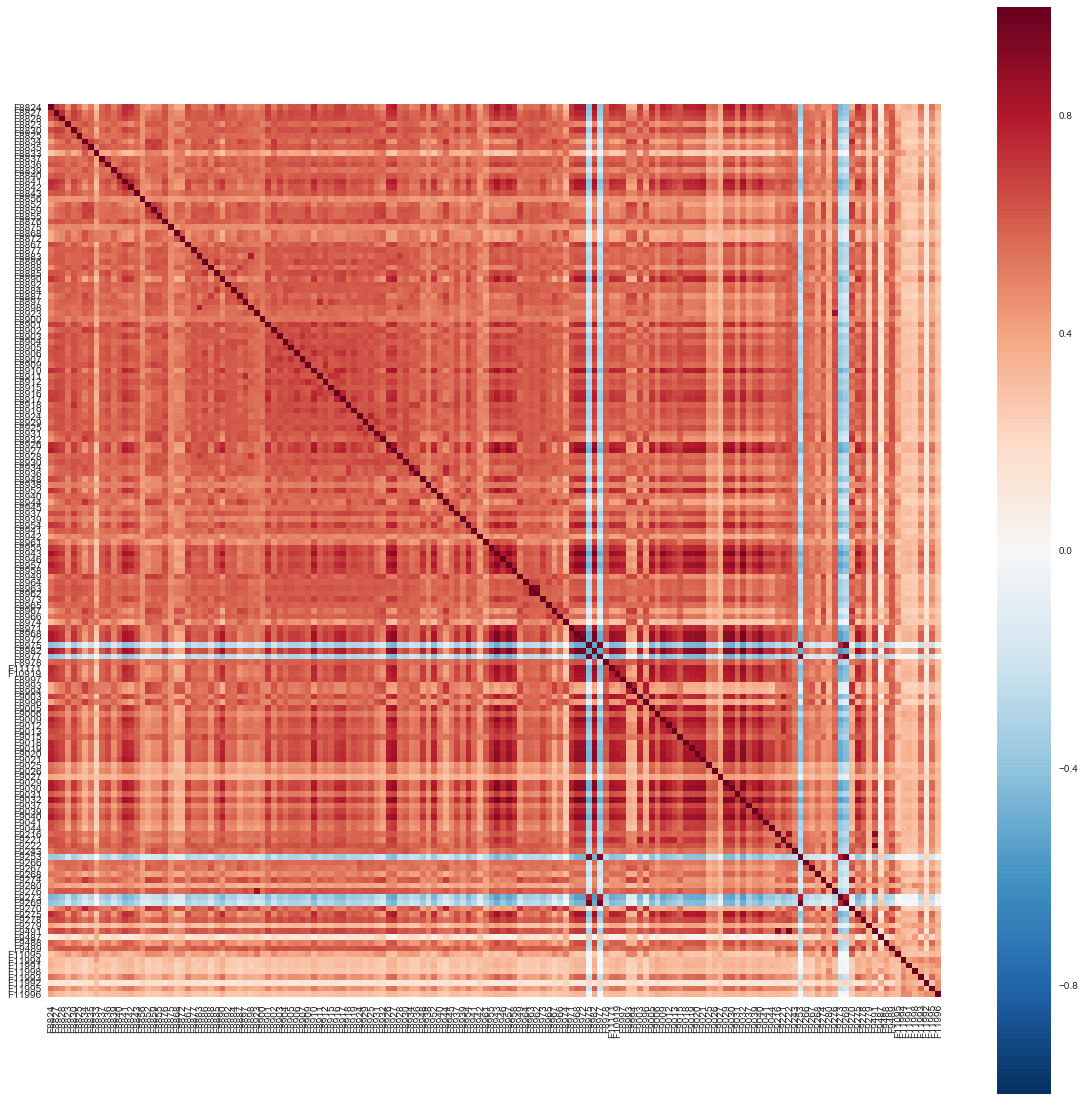

In [195]:
plt.figure(figsize=(20, 20))
sns.heatmap(part_222_lifestyle_char.iloc[:,46:].corr(), square=True)

In [215]:
pca_c2 = PCA()
pca_c2.set_params(n_components=None)
pca_c2.fit(part_222_lifestyle_char.iloc[:,46:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

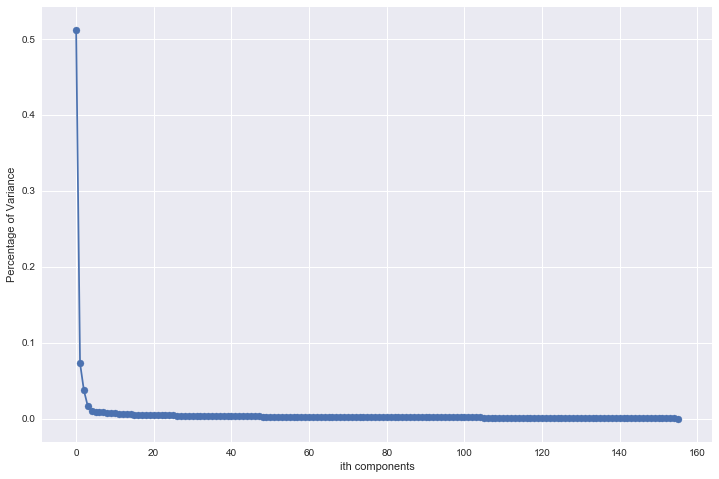

In [216]:
plt.figure(figsize=(12, 8))
plt.plot(range(156), pca_c2.explained_variance_ratio_)
plt.scatter(range(156), pca_c2.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

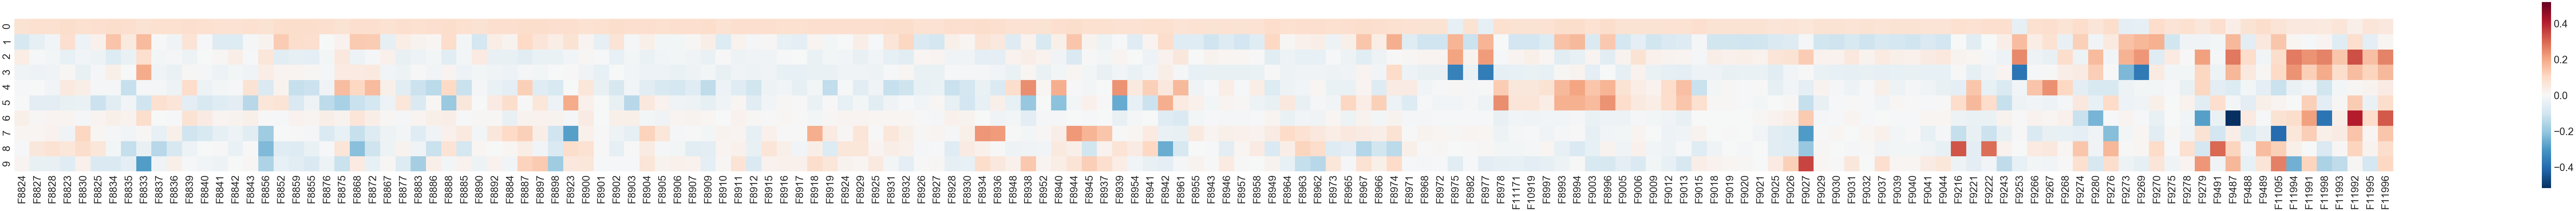

In [220]:
n_components_to_show = min(10, pca_c2.n_components_)
n_input_features = pca_c2.components_.shape[1]

decomp_df = pd.DataFrame(pca_c2.components_[0:n_components_to_show],
                            columns=part_222_lifestyle_char.iloc[:,46:].columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

In [229]:
print(part_222_lifestyle_char.iloc[:,46:].columns[np.abs(pca_c2.components_[1])>0.15])
print(pca_c2.components_[1][np.abs(pca_c2.components_[1])>0.15])

Index(['F8833', 'F8974', 'F8975', 'F8977', 'F8993', 'F8994', 'F9253', 'F9273',
       'F9269', 'F9270', 'F9487'],
      dtype='object')
[ 0.16327359  0.1894318   0.17686107  0.17568797  0.15056691  0.16598468
  0.15852088  0.1517945   0.17020535  0.18504492  0.16827982]


In [4]:
# all these are model predicted likelyhood number
# note: 1=highest likelyhood, 99 = lowest likelyhood, 0 = unknown
print(part_222_lifestyle_num.head(15))
part_222_lifestyle_num.columns

    F14682  F16379  F14813  F16386  F16390  F16394  F16384  F14827  F16922  \
0       77      69      41      70      86      58      30      39      22   
1       41      22      34      34      61      35      10       9      75   
2       55      71      49      33      60      70      74      23      11   
3        0       0       0       0       0       0       0       0       0   
4       13      11      20      48      20      53      23      34      99   
5       68      11       6      41      40      46      19      50      27   
6       55      61      81      62      77      29      20      42      41   
7       75      10      23      67      68      78      16      81      47   
8       55      20      49      21      61      26      36      63       6   
9       28       5       8       6      11      51      25      20      39   
10      35      23      39      48      14      31      17      10      99   
11      55      41      49      73      23      57      13      

Index(['F14682', 'F16379', 'F14813', 'F16386', 'F16390', 'F16394', 'F16384',
       'F14827', 'F16922', 'F16377', 'F14684', 'F16381', 'F14708', 'F16378',
       'F14686', 'F14825', 'F14826', 'F16385', 'F16392', 'F16400', 'F16376',
       'F16399', 'F14687', 'F14688', 'F17214', 'F17216', 'F17208', 'F17209',
       'F17210', 'F17215', 'F17218', 'F17211', 'F17212', 'F17219', 'F17213',
       'F16388', 'F16389', 'F16401', 'F16391', 'F16383', 'F14828', 'F16395',
       'F16396', 'F16397', 'F16380', 'F16393', 'F16398', 'F16923', 'F14815',
       'F16402', 'F14685', 'F14683', 'F16921', 'F16928', 'F16924', 'F16925',
       'F16926', 'F16927', 'F16929', 'F16382'],
      dtype='object')

In [5]:
# missingness
# no missing value
part_222_lifestyle_num.isnull().values.any()

False

In [6]:
# change 0(unknow) to 100
# ready for PCA
part_222_lifestyle_num2 = part_222_lifestyle_num.replace(0, 50)
# part_222_lifestyle_num_scaled = part_222_lifestyle_num2 / np.std(part_222_lifestyle_num2, 0)

In [7]:
part_222_lifestyle_num2.head(15)

F14682  F16379  F14813  F16386  F16390  F16394  F16384  F14827  F16922  \
0       77      69      41      70      86      58      30      39      22   
1       41      22      34      34      61      35      10       9      75   
2       55      71      49      33      60      70      74      23      11   
3       50      50      50      50      50      50      50      50      50   
4       13      11      20      48      20      53      23      34      99   
5       68      11       6      41      40      46      19      50      27   
6       55      61      81      62      77      29      20      42      41   
7       75      10      23      67      68      78      16      81      47   
8       55      20      49      21      61      26      36      63       6   
9       28       5       8       6      11      51      25      20      39   
10      35      23      39      48      14      31      17      10      99   
11      55      41      49      73      23      57      13      45      51   
12      50      50      50      50      50      50      50      50      50   
13      55      16      17      91      20      45      52      39      99   
14      43      13       2      70      43      56      54      58      20   

    F16377  F14684  F16381  F14708  F16378  F14686  F14825  F14826  F16385  \
0       67      34      16      22      55      38      70      93      73   
1       40      32      10      12      17      24      26      72      35   
2       33      49      73      73      74      72      90      61      29   
3       50      50      50      50      50      50      50      50      50   
4       32      51      17      56      31      10      23      42       5   
5       29      59      15      57      12      51      30      52       7   
6       63      36      30      88      65      13      74      97      65   
7       49      16      16      56      74      57       7      82      20   
8       64      63      26      37      69      61      64      73      25   
9       41      58      23      35      43      33       9      13       9   
10      44      70      24      41      26      30      55      73      25   
11      48      70      24      61      53      38      48      80      43   
12      50      50      50      50      50      50      50      50      50   
13      57      18      24      93      57      38      87      46       5   
14      52       2      29      78      42      48      63      19      34   

    F16392  F16400  F16376  F16399  F14687  F14688  F17214  F17216  F17208  \
0       97      21      50       5      38      18      68      71      71   
1       87      14      60       4      20      18      31      45      28   
2       43      56      12      90      96      43      54      33      82   
3       50      50      50      50      50      50      50      50      50   
4       74      58      40      44      12      35       3       1      37   
5       83      44      31      41      24      11       9      36      42   
6       71      16      53      29      14      35      87      75      79   
7       71      23      45      12      41      24      84      76      25   
8       59      35      51      57      75      21      80      71      79   
9       43      59       2      69      77      44      10       7      29   
10      78      14      38      22      40      35      43      10      48   
11      66      17      47      52      48      58      54       4      44   
12      50      50      50      50      50      50      50      50      50   
13      50      37       5      72      62      21      46       7      77   
14      75      33      23      28      82      21      67      45      83   

    F17209  F17210  F17215  F17218  F17211  F17212  F17219  F17213  F16388  \
0        4      48      73      14      74      15      56       1      83   
1        7       6      51      14      38      19      17       4      66   
2       26      52     

In [16]:
pca = PCA()
pca.set_params(n_components=None)
pca.fit(part_222_lifestyle_num2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

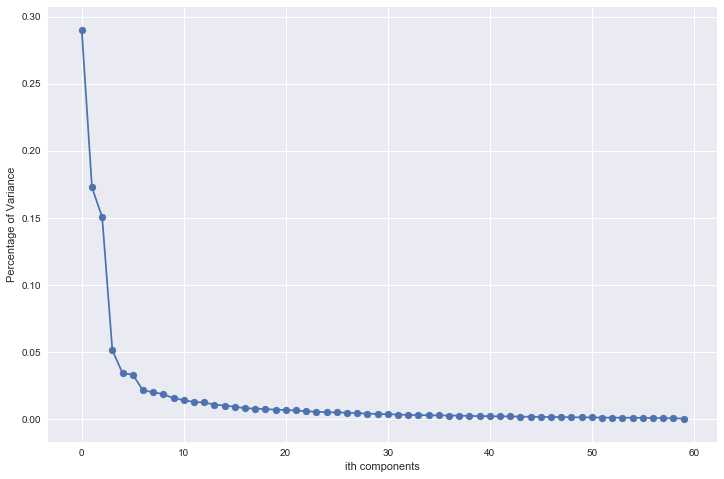

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(range(60), pca.explained_variance_ratio_)
plt.scatter(range(60), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

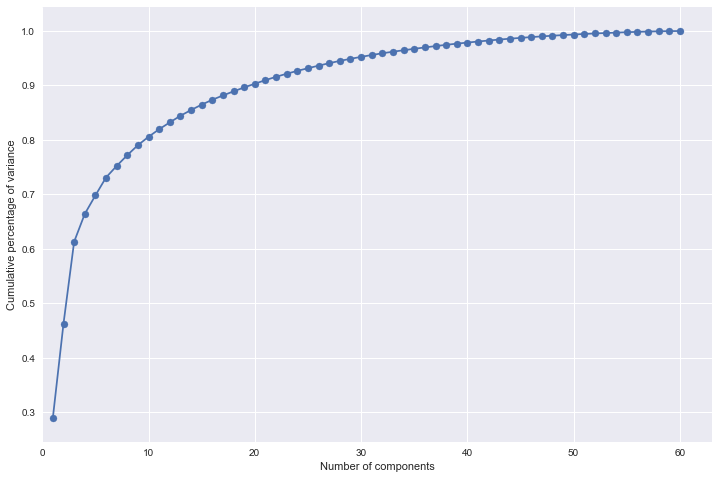

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 61), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, 61), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 63)
plt.show()

In [13]:
pca.components_[:6]

array([[ -1.11475364e-01,   2.33901892e-02,  -1.97260704e-01,
         -1.46338055e-01,  -2.20099244e-01,  -8.28632806e-02,
         -1.06940618e-01,  -1.18665064e-01,  -1.05715130e-01,
          4.88301620e-02,  -1.04136177e-01,  -1.50096026e-01,
         -8.03982302e-02,   1.74819045e-02,   5.28863101e-03,
         -5.66194755e-02,  -1.00507103e-01,  -1.90639494e-01,
          1.05229896e-01,  -1.35747242e-01,  -1.64756798e-01,
         -9.77615809e-02,  -2.11529006e-03,   4.08891077e-02,
         -1.47231007e-01,  -1.92986086e-01,   8.33471181e-02,
         -4.10538169e-02,   4.27898479e-02,  -1.56824730e-01,
         -6.64077477e-02,  -1.79456689e-01,   8.00438452e-02,
         -1.88273912e-01,   1.16577933e-02,  -2.01942459e-01,
         -2.12528371e-01,  -9.21670631e-03,  -5.51154044e-02,
         -1.50987781e-01,  -6.79535847e-02,  -1.29224445e-01,
         -1.79204041e-01,  -2.20563212e-01,  -5.38639757e-02,
         -1.72483479e-01,  -1.83298915e-01,   4.21297758e-02,
        

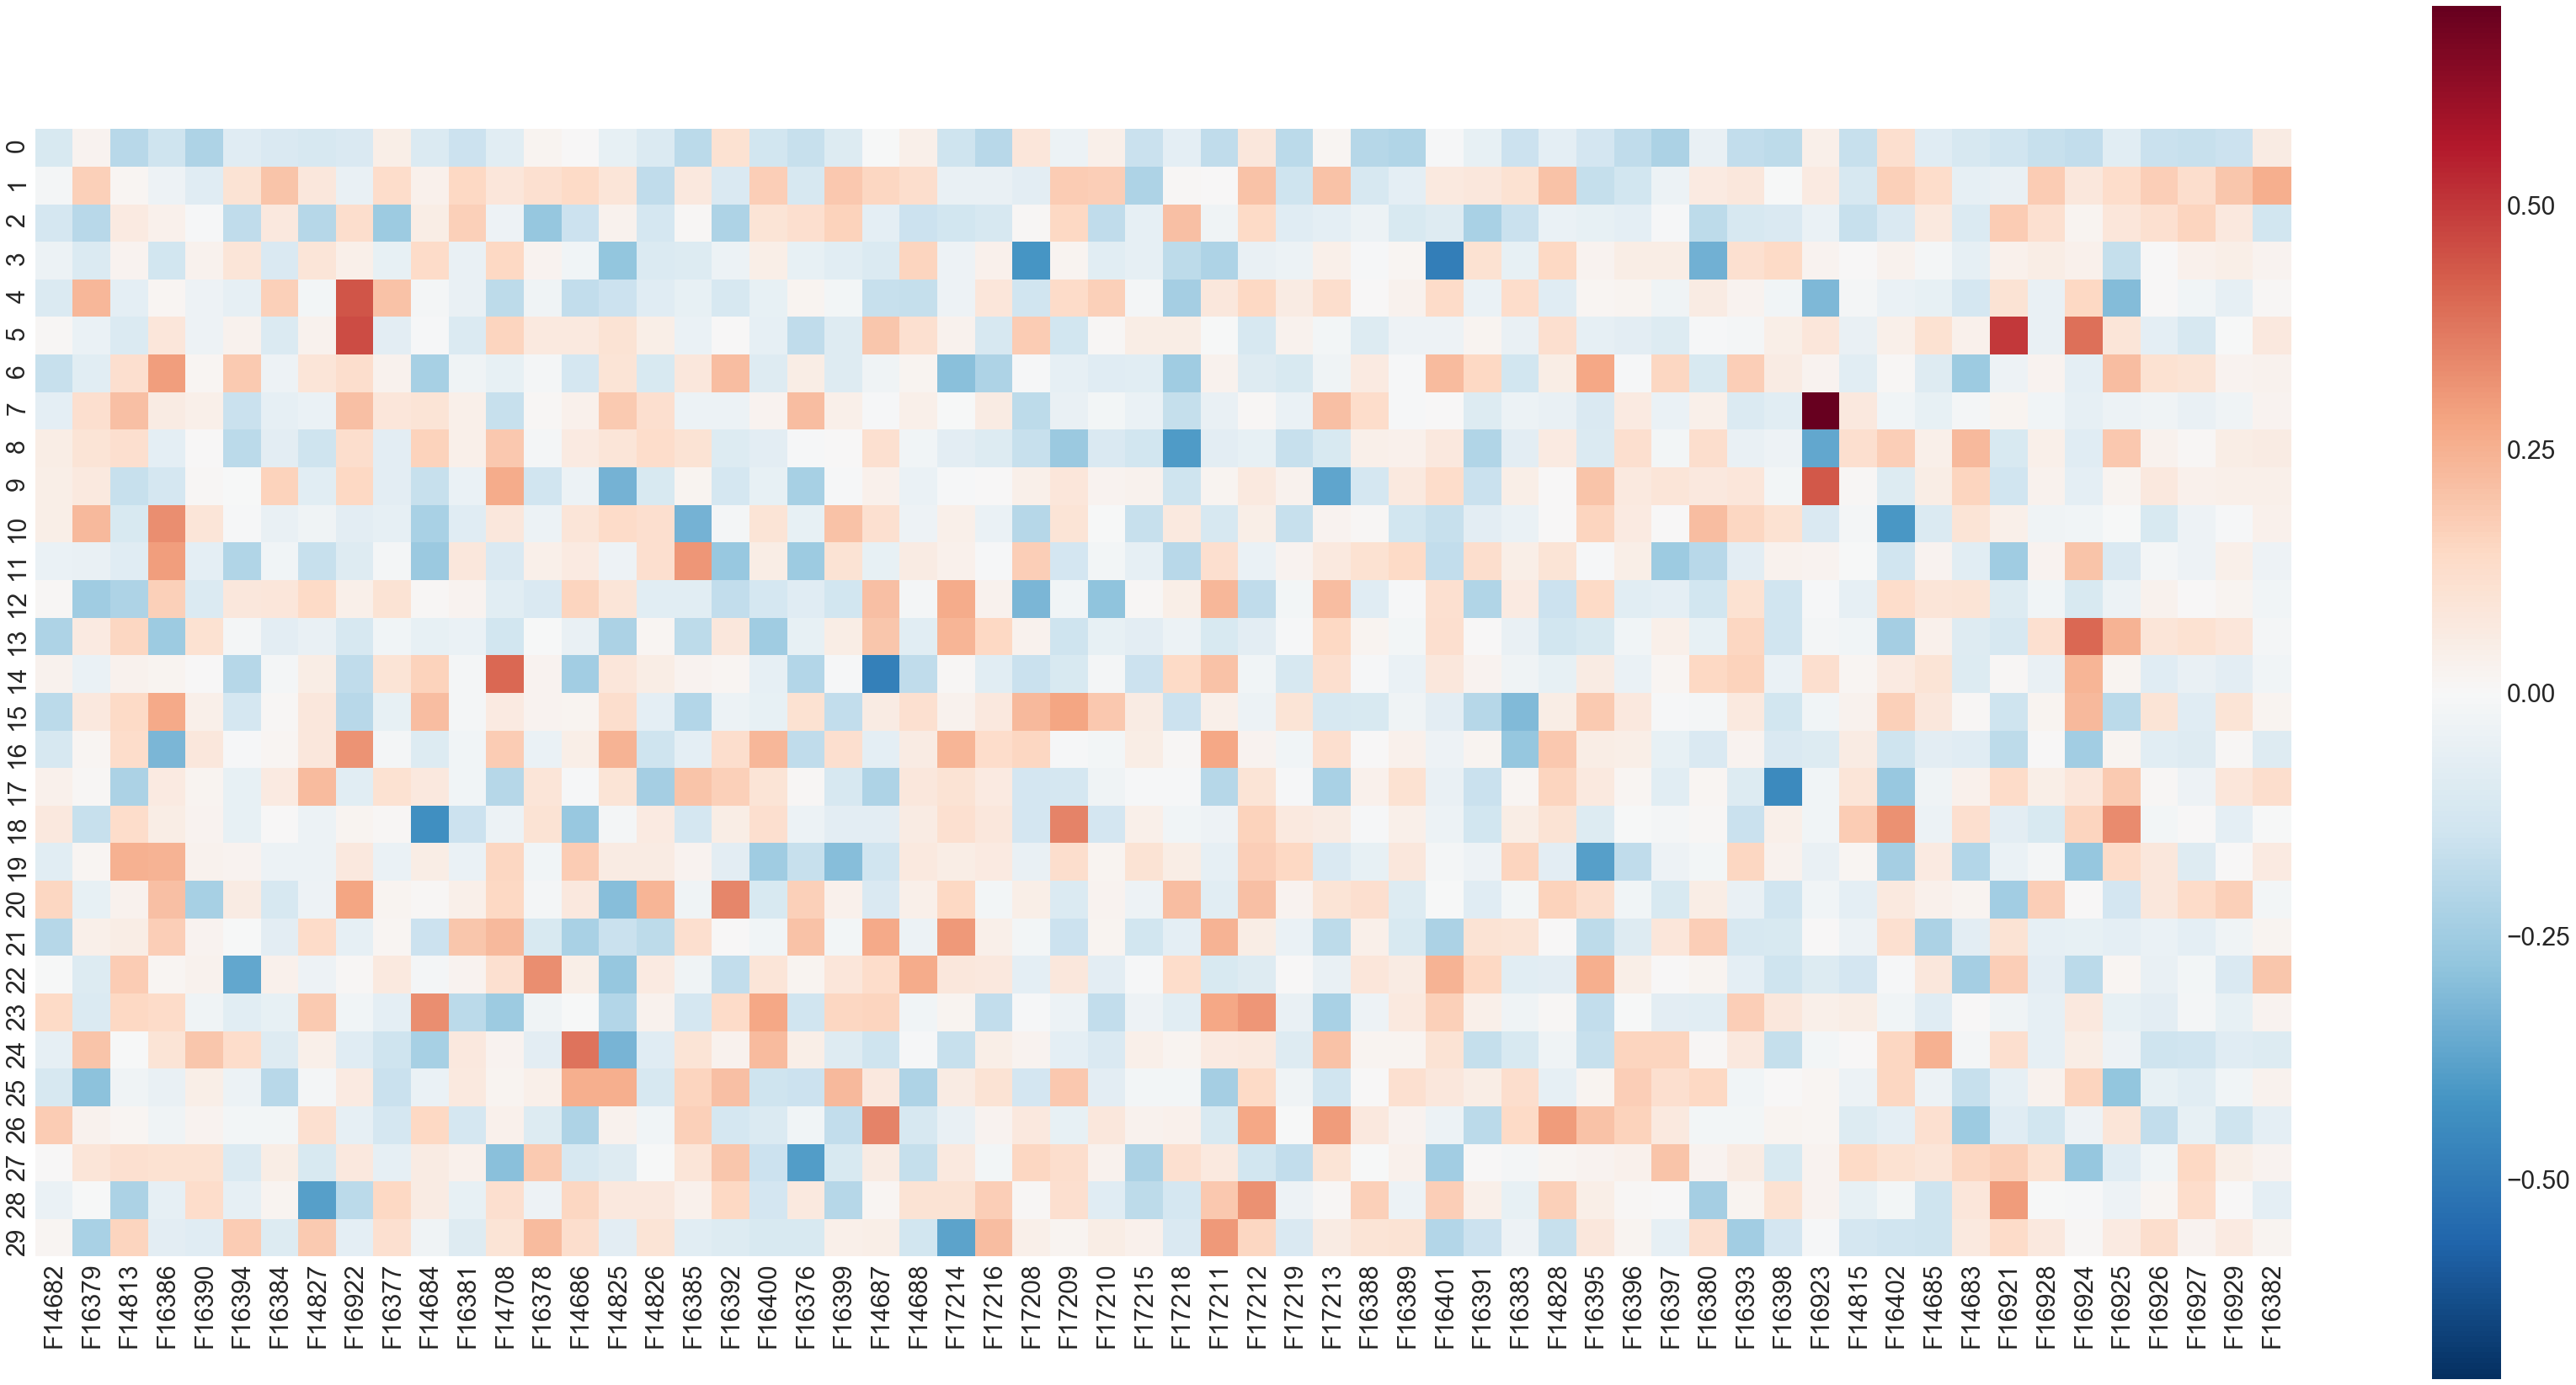

In [19]:
n_components_to_show = min(30, pca.n_components_)
n_input_features = pca.components_.shape[1]

decomp_df = pd.DataFrame(pca.components_[0:n_components_to_show],
                            columns=part_222_lifestyle_num2.columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

In [27]:
part_222_media_num = pd.read_csv('~/Documents/222media_Numeric.csv', index_col=0)
part_222_media_num.head(15)

F16958  F16959  F19395  F16961  F16962  F16963  F16964  F16965  F16966  \
0        1       5       2       7       8       7       8       9       7   
1        3       5       4       4       6       7       6       8       3   
2        6       7       6       3       3       6       2       6       5   
3        0       0       0       0       0       0       0       0       0   
4        2       8       5       1       3       6       7       7       3   
5        2       6       5       4       6       7       7       9       3   
6        5       1       3       8       9       8       8       8       8   
7        5       1       3       9       8       9       8       9       9   
8        1       3       2       8       7       7       7       7       7   
9        3       6       3       4       6       6       5       7       3   
10       3       6       5       4       4       7       6       7       3   
11       4       4       6       7       3       6       6       7       7   
12       0       0       0       0       0       0       0       0       0   
13       3       8       5       3       4       6       5       7       3   
14       5       7       7       4       6       7       7       9       5   

    F16967  F16968  F16969  F16970  F16971  F16972  
0        3       7       3       2       4       4  
1        2       1       1       3       3       4  
2        7       4       6       8       7       5  
3        0       0       0       0       0       0  
4        1       3       6       2       3       1  
5        2       2       4       2       3       2  
6        3       7       3       5       7       5  
7        7       7       1       5       7       8  
8        6       7       6       4       7       5  
9        2       3       7       3       3       2  
10       3       3       4       2       3       5  
11       6       3       6       5       4       5  
12       0       0       0       0       0       0  
13       3       4       6       3       4       2  
14       3       8       6       3       7       5

In [28]:
print("numeric columns: {}".format(part_222_media_num.shape))

numeric columns: (279506, 15)


In [29]:
part_222_media_num.isnull().values.any()

False

In [30]:
part_222_media_num2 = part_222_media_num.replace(0, 10)
part_222_media_num_scaled = part_222_media_num2 / np.std(part_222_media_num2, 0)
part_222_media_num_scaled.head(15)

F16958    F16959    F19395    F16961    F16962    F16963    F16964  \
0   0.408274  2.219473  0.800387  2.832351  3.670122  3.360901  3.163857   
1   1.224822  2.219473  1.600773  1.618486  2.752592  3.360901  2.372892   
2   2.449645  3.107262  2.401160  1.213865  1.376296  2.880773  0.790964   
3   4.082742  4.438946  4.001933  4.046216  4.587653  4.801288  3.954821   
4   0.816548  3.551157  2.000967  0.404622  1.376296  2.880773  2.768374   
5   0.816548  2.663368  2.000967  1.618486  2.752592  3.360901  2.768374   
6   2.041371  0.443895  1.200580  3.236973  4.128887  3.841030  3.163857   
7   2.041371  0.443895  1.200580  3.641594  3.670122  4.321159  3.163857   
8   0.408274  1.331684  0.800387  3.236973  3.211357  3.360901  2.768374   
9   1.224822  2.663368  1.200580  1.618486  2.752592  2.880773  1.977410   
10  1.224822  2.663368  2.000967  1.618486  1.835061  3.360901  2.372892   
11  1.633097  1.775578  2.401160  2.832351  1.376296  2.880773  2.372892   
12  4.082742  4.438946  4.001933  4.046216  4.587653  4.801288  3.954821   
13  1.224822  3.551157  2.000967  1.213865  1.835061  2.880773  1.977410   
14  2.041371  3.107262  2.801353  1.618486  2.752592  3.360901  2.768374   

      F16965    F16966    F16967    F16968    F16969    F16970    F16971  \
0   3.294520  2.647377  1.233971  2.677176  1.155386  0.793712  1.755985   
1   2.928462  1.134590  0.822648  0.382454  0.385129  1.190569  1.316989   
2   2.196347  1.890984  2.879267  1.529815  2.310771  3.174850  3.072973   
3   3.660578  3.781968  4.113238  3.824538  3.851285  3.968562  4.389962   
4   2.562405  1.134590  0.411324  1.147361  2.310771  0.793712  1.316989   
5   3.294520  1.134590  0.822648  0.764908  1.540514  0.793712  1.316989   
6   2.928462  3.025574  1.233971  2.677176  1.155386  1.984281  3.072973   
7   3.294520  3.403771  2.879267  2.677176  0.385129  1.984281  3.072973   
8   2.562405  2.647377  2.467943  2.677176  2.310771  1.587425  3.072973   
9   2.562405  1.134590  0.822648  1.147361  2.695900  1.190569  1.316989   
10  2.562405  1.134590  1.233971  1.147361  1.540514  0.793712  1.316989   
11  2.562405  2.647377  2.467943  1.147361  2.310771  1.984281  1.755985   
12  3.660578  3.781968  4.113238  3.824538  3.851285  3.968562  4.389962   
13  2.562405  1.134590  1.233971  1.529815  2.310771  1.190569  1.755985   
14  3.294520  1.890984  1.233971  3.059630  2.310771  1.190569  3.072973   

      F16972  
0   1.766429  
1   1.766429  
2   2.208037  
3   4.416074  
4   0.441607  
5   0.883215  
6   2.208037  
7   3.532859  
8   2.208037  
9   0.883215  
10  2.208037  
11  2.208037  
12  4.416074  
13  0.883215  
14  2.208037

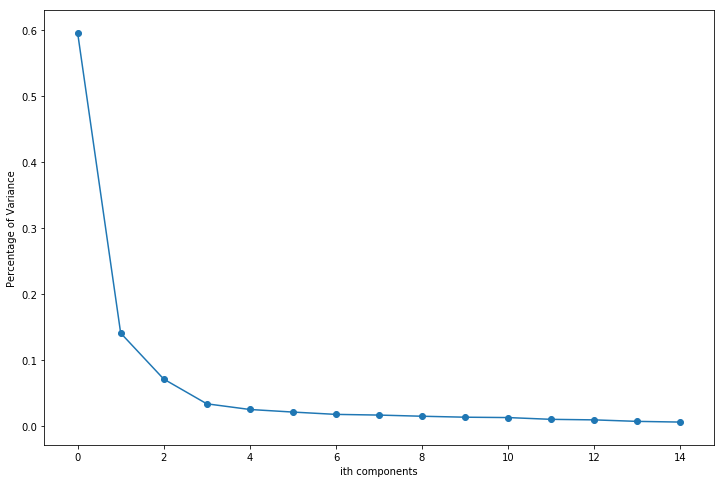

In [31]:
pca_media = PCA()
pca_media.set_params(n_components=None)
pca_media.fit(part_222_media_num_scaled)

plt.figure(figsize=(12, 8))
plt.plot(range(15), pca_media.explained_variance_ratio_)
plt.scatter(range(15), pca_media.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

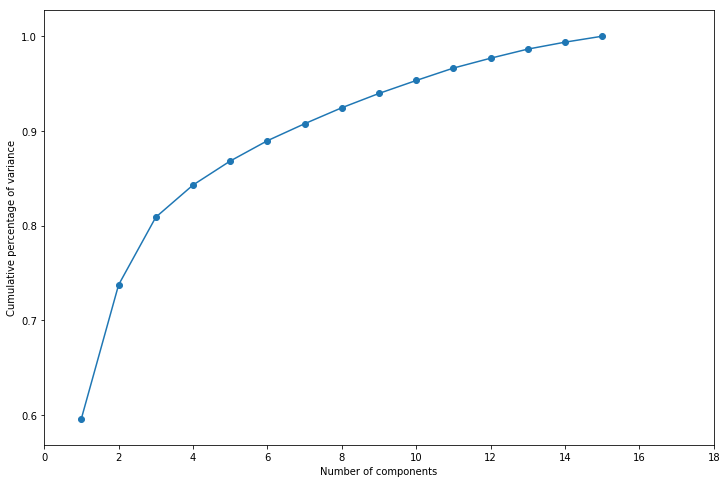

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 16), np.cumsum(pca_media.explained_variance_ratio_))
plt.plot(range(1, 16), np.cumsum(pca_media.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 18)
plt.show()

In [33]:
pca_media.components_

array([[-0.28370036, -0.0732155 , -0.23743937, -0.30394638, -0.25969668,
        -0.241386  , -0.2250428 , -0.18342565, -0.30052103, -0.29246115,
        -0.28412894, -0.22014282, -0.28041809, -0.29561922, -0.29039694],
       [ 0.2306561 ,  0.3056244 ,  0.33370273, -0.06757439, -0.31787588,
        -0.33764486, -0.38660172, -0.40005044, -0.11467431,  0.16689941,
        -0.03307149,  0.28836214,  0.27804067,  0.1016505 ,  0.00508047],
       [ 0.14468843, -0.77686   , -0.19530929,  0.1655327 , -0.07160142,
        -0.14110734, -0.22987455, -0.32138041,  0.15448205,  0.11385434,
         0.14273119, -0.18352406,  0.12991342,  0.12204646,  0.07866169],
       [-0.04108021, -0.36038094,  0.23528642,  0.01517222, -0.03960933,
        -0.11641049,  0.09338902,  0.12383877,  0.07410769, -0.21281725,
         0.21096116,  0.71202518, -0.19634499, -0.2202001 , -0.29045346],
       [ 0.02166861, -0.13509543,  0.30792295, -0.10168   , -0.27622458,
        -0.25497174, -0.09606752,  0.65667404, 